--- 

># **코드설명**

---

- 파 일 명 : 블랙 프라이데이 판매 예측 <br>
- 시작날짜 : 2021.11.25 <br>
- 수정날짜 : 2022.01.07 <br>
- 작 성 자 : 김혁진 <br>
- 작성주제 : DataHackaton / 블랙 프라이데이 판매 예측 <br>

--- 

- **참조**

  (1) 대회 홈페이지 : [DataHackaton](https://datahack.analyticsvidhya.com/contest/black-friday/#About) <br>
  (2) 하이퍼 파리미터 설명 : [Naver Blog](https://blog.naver.com/wideeyed/221333529176) <br>
  (3) Class문 설명 : [Github](https://zzsza.github.io/development/2020/07/05/python-class/) <br>
  (4) GPU 설정 : [Medium](https://medium.com/@am.sharma/lgbm-on-colab-with-gpu-c1c09e83f2af) <br>
  (5) RAM 모두사용으로 세션다운 : [Tistory](https://somjang.tistory.com/entry/Google-Colab-%EC%9E%90%EC%A3%BC%EB%81%8A%EA%B8%B0%EB%8A%94-%EB%9F%B0%ED%83%80%EC%9E%84-%EB%B0%A9%EC%A7%80%ED%95%98%EA%B8%B0)

---

- **고려사항** <br>
  (1) AutoEncoder로 파생변수 생성해보기 <br>
  (2) 하이퍼파라미터 탐색 : grid-search, bayesian-optimization, [optuna](https://dacon.io/competitions/official/235713/codeshare/2704?page=1&dtype=recent) <br>
  (3) RandomForest, XGBoost, Lightgbm, CatBoost 설명 [블로그](https://jhkim0759.tistory.com/12)

---

># **기본설정**

<br></br>
## Query Start Time

In [1]:
import time
query_start_time = time.time()

<br></br>
## Github 연동

In [2]:
# 로그인
git config --global user.email "hyuckjin12@naver.com"
git config --global user.name  "hyuckjinkim"
git config -l

# 해당폴더로 들어가기
cd 'E:/USB포맷_210223/Python/★PSC/1. 블랙 프라이데이 판매 예측(데이터 해커톤)'
git init

# 상태확인
git status

# 모든 파일 추가 후, commit
git add .
git commit -m 'new ipynb file'

# 파일넣기
cd 'E:/USB포맷_210223/Python/★PSC/1. 블랙 프라이데이 판매 예측(데이터 해커톤)'
git remote rm origin
git remote add origin https://github.com/hyuckjinkim/DataHackaton.git

git push origin master

<br></br>
## Markdown : Tabular Left Align

In [3]:
%%html
<style>
    table {float:left}
</style>

<br></br>
## Jupyter Notebook Style : Theme, Display, TOC, ...

In [4]:
# # theme 설치
# !pip install jupyterthemes

# # jupyter notebook 최신버전
# !pip install --upgrade notebook

# # jupyter notebook 최신버전
# !pip install --upgrade jupyterthemes

# 2.2.1. 테마바꾸기(customizing)
# !jt -t onedork -fs 115 -nfs 125 -tfs 115 -dfs 115 -ofs 115 -cursc r -cellw 80% -lineh 115 -altmd  -kl -T -N

# 2.2.2. 쥬피터 노트북 화면 넓게 사용
# 출처: https://taehooh.tistory.com/entry/Jupyter-Notebook-주피터노트북-화면-넓게-쓰는방법
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:80% !important; }</style>"))

# # 2.2.3. 좌측 TOC 만들기
# # 출처 : https://gmnam.tistory.com/246
# !pip install jupyter_nbextensions_configurator
# !pip install jupyter_contrib_nbextensions

# !jupyter nbextensions_configurator enable --user
# !jupyter contrib nbextension install --user

# !pip install nbconvert

# !pip install jupytext

In [5]:
# # 2.3.1 Google Drive Mount
# # (Google Drive 사용 시 설정)
# from google.colab import drive
# drive.mount('/content/drive', force_remount = True) # 새로운 창에서 key 를 받아서 입력해야합니다. 

# # 2.3.2. 메모리 에러
# https://growingsaja.tistory.com/477

In [6]:
# # 2.3.3. GPU 사용 (6분)
# !git clone --recursive https://github.com/Microsoft/LightGBM
# !mkdir build
# %cd /content/LightGBM
# !cmake -DUSE_GPU=1 #avoid ..
# !make -j$(nproc)
# !sudo apt-get -y install python-pip
# !sudo -H pip install setuptools pandas numpy scipy scikit-learn -U
# %cd /content/LightGBM/python-package

<br></br>
##### Install Modules

In [7]:
# !pip uninstall pandas -y
# !pip uninstall numpy  -y
# !pip uninstall lightgbm -y

# !pip install pandas==1.1.0
# !pip install numpy==1.21.2
# !pip install -U scikit-learn
# !pip install lightgbm --install-option=--gpu

# !pip install seaborn
# !pip install plotnine
# !pip install pandasql

# lightgbm 에러떴는데, 콘다에서 실행하면 해결됨
# conda install -c conda-forge lightgbm 

# bayesian optimization 설치
# !pip install bayesian-optimization

# xgboost 설치
# !pip install xgboost

# catboost 설치
# !pip install catboost

# !pip install dill

# pycaret 에러떴는데, --user 붙이니깐 해결됨
# !pip install --user pycaret

# !pip install qgrid
# !jupyter nbextension enable --py --sys-prefix qgrid

<br></br>
## Import Modules

In [8]:
# jupyter notebook 전용
from tqdm.notebook import tqdm
# from tqdm import tqdm

# basic modules
import pandas as pd
import numpy as np
import math
import warnings
import random
import os
import time
import itertools

import qgrid

# value_counts() 범용적인 버전
from collections import Counter as cnt

# save env.
import dill

# plotting
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.set_style('whitegrid')

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [11.7, 8.27] # [15, 10] # [11.7,8.27] - A4 size
plt.style.use('dark_background')
plt.rcParams['font.family'] = 'Malgun Gothic'

from plotnine import *


# sqldf
from pandasql import sqldf
sql = lambda q: sqldf(q, globals())


# modeling
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score,StratifiedKFold,train_test_split
from sklearn.metrics import f1_score,make_scorer,r2_score
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeClassifier, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor, AdaBoostClassifier
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


# import lightgbm
# !pip install lightgbm --install-option=--gpu --install-option="--opencl-include-dir=/usr/local/cuda/include/" --install-option="--opencl-library=/usr/local/cuda/lib64/libOpenCL.so"
import lightgbm as lgb

# Hyperparameter Optimization
from bayes_opt import BayesianOptimization
import optuna

<br></br>
## Initial Values

In [9]:
# 2.5.1. Data Path
# jupyter.notebook : 'os.getcwd() + '/DAT/블랙 프라이데이 판매 예측/''
# google.colab     : '/content/drive/MyDrive/Python/4. 블랙프라이데이 판매예측/DAT/'
BASE_PATH = 'E:/USB포맷_210223/Python'
DATA_PATH = BASE_PATH + '/DAT/1. 블랙 프라이데이 판매 예측(데이터 해커톤)/'
OUT_PATH  = BASE_PATH + '/OUT/1. 블랙 프라이데이 판매 예측(데이터 해커톤)/'

# 2.5.2. set seed
SEED = 777

# 2.5.3. plot
PLOT = True

# 2.5.5. missing check
MISSING_CHECK = True

# 2.5.6. interaction
INTERACTION_CHECK = True
INTERACTION = True

# 2.5.7. scaling
SCALE_CHECK = True
SCALE = True

# 2.5.8. lightgbm parameter
# 처음 (INIT_POINTS)회 랜덤 값으로 score 계산 후 (N_ITER)회 최적화
INIT_POINTS = 15
N_ITER = 15
N_CV = 4
EARLY_STOPPING_ROUNDS = 30
N_ESTIMATORS = 2000
OBJECTIVE = ['binary','regression'][1]
METRIC = ['auc','binary_logloss','rmse'][2]

# initial value save
ini_var = [
    'SEED','PLOT','SCALE','INTERACTION','MISSING_CHECK','INTERACTION_CHECK',
    'INIT_POINTS','N_ITER','N_CV','EARLY_STOPPING_ROUNDS','N_ESTIMATORS','OBJECTIVE','METRIC'
]

<br></br>
## Set Off the Warning

In [10]:
pd.set_option('mode.chained_assignment', None)
warnings.filterwarnings(action='ignore')

<br></br>
## User Defined Function

In [11]:
#--codefoling--#


#-------------------------------------------------------------------------------------------------------#
# 2.6.1. Seed Fix
#-------------------------------------------------------------------------------------------------------#
def seed_everything(seed: int = 1):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    # torch.manual_seed(seed)
    # torch.cuda.manual_seed(seed)  # type: ignore
    # torch.backends.cudnn.deterministic = True  # type: ignore
    # torch.backends.cudnn.benchmark = True  # type: ignore


seed_everything(SEED)

#-------------------------------------------------------------------------------------------------------#
# 2.6.2. View all columns
#-------------------------------------------------------------------------------------------------------#


def View(data):

    pd.set_option('display.max_rows', 500)
    pd.set_option('display.max_columns', 500)
    pd.set_option('display.width', 1000)

    print(data)

    pd.set_option('display.max_rows', 0)
    pd.set_option('display.max_columns', 0)
    pd.set_option('display.width', 0)

#-------------------------------------------------------------------------------------------------------#
# 2.6.3. minmax function
#-------------------------------------------------------------------------------------------------------#


def minmax(x, digit=None):
    if round is None:
        return min(x), max(x)
    else:
        return round(min(x), digit), round(max(x), digit)

#-------------------------------------------------------------------------------------------------------#
# 2.6.4. 컬럼dict에서 target 제거
#-------------------------------------------------------------------------------------------------------#
# - dict : 기준 dict
# - key  : 삭제할 key
#-------------------------------------------------------------------------------------------------------#


def rmkey(dict, key):
    tmp = dict.copy()
    del tmp[key]
    return tmp

#-------------------------------------------------------------------------------------------------------#
# 2.6.5. 각 컬럼의 missing 개수를 파악하는 함수
#-------------------------------------------------------------------------------------------------------#
# - data     : 기준 data
# - col_type : {column명 : type}로 이루어진 dictionary
#-------------------------------------------------------------------------------------------------------#


def missing_column_check(df, col_type):

    data = df.copy()

    n_na = []
    n_na_type = []
    for col_nm in data.columns:
        data[col_nm] = data[col_nm].astype(col_type[col_nm])

        # str인 경우에는 blank(공백)도 있는지 확인
        if col_type[col_nm] == str:

            isnull_cnt = data[col_nm].str.strip().isnull().sum()
            blank_cnt = sum(data[col_nm].str.strip() == '')
            nan_cnt = sum(data[col_nm].str.strip() == 'nan')
            null_cnt = sum(data[col_nm].str.strip() == 'null')

            n_na_x = isnull_cnt+blank_cnt+nan_cnt+null_cnt
            n_na.append(n_na_x)

            if n_na_x > 0:
                n_na_type_x = []
                if isnull_cnt > 0:
                    n_na_type_x.append('isnull')
                if blank_cnt > 0:
                    n_na_type_x.append('blank')
                if nan_cnt > 0:
                    n_na_type_x.append('nan')
                if null_cnt > 0:
                    n_na_type_x.append('null')
                n_na_type_x = '+'.join(n_na_type_x)
            else:
                n_na_type_x = ''
            n_na_type.append(n_na_type_x)

        # numeric인 경우에는 null의 개수만 확인
        else:
            n_na_x = data[col_nm].isnull().sum()
            n_na.append(n_na_x)

            if n_na_x > 0:
                n_na_type.append('isnull')
            else:
                n_na_type.append('')

    res_df = pd.DataFrame({
        'col': data.columns,
        'n_na': n_na,
        'n_n_ratio': [str(round(n/len(data)*100, 1))+'%' for n in n_na],
        'na_type': n_na_type,
        'col_type': [COL_TYPE[col].__name__ for col in data.columns]
    })

    res_df = res_df[res_df['n_na'] > 0]
    if len(res_df) == 0:
        return('Dataset does not have a null value')
    else:
        return(res_df)

#-------------------------------------------------------------------------------------------------------#
# 2.6.6. 교호작용항 추가
#-------------------------------------------------------------------------------------------------------#
# - data     : 기준 data
# - num_vari : 숫자형 변수 list
#-------------------------------------------------------------------------------------------------------#


def interaction_term(df, num_vari):

    data = df.copy()

    num_var = list(set(num_vari) - set(['id']))

    for i in range(0, len(num_var)):
        for j in range(i, len(num_var)):
            data[f'{num_var[i]}*{num_var[j]}'] = data[f'{num_var[i]}'] * \
                data[f'{num_var[j]}']

    return(data)

#-------------------------------------------------------------------------------------------------------#
# 2.6.7. color when print
#-------------------------------------------------------------------------------------------------------#


class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

#-------------------------------------------------------------------------------------------------------#
# 2.6.8. density plot : histogram + density plot
#-------------------------------------------------------------------------------------------------------#
# - data : 기준 data
# - vars : hist + kde를 그릴 숫자형 변수
# - hue  : group화 변수
# - binwidth_adj_ratio : binwidth 조정 비율
#-------------------------------------------------------------------------------------------------------#


def density_plot(df, vars,
                 binwidths=None, hue=None,
                 binwidth_adj_ratio=None,
                 figsize=(15, 7)):

    from matplotlib.ticker import PercentFormatter

    data = df.copy()

    # 1) vars가 1개뿐일 때 에러발생
    #    -> 1개     : type = str
    #    -> 2개이상 : type = ndarray, ...
    if type(vars) == str:
        vars = [vars]

    # 2) plotting (nrow,ncol) 설정
    nrow = math.ceil(len(vars)**(1/2))
    ncol = nrow

    # 3) binwidths가 없을 때, binwidth 설정
    # 출처 : http://www.aistudy.co.kr/paper/pdf/histogram_jeon.pdf
    if binwidths is None:
        binwidths = []
        for col in data[vars].columns:
            n_bin = math.ceil(1 + 3.32*math.log10(len(data)))
            binwidth = (data[col].max() - data[col].min()) / n_bin
            binwidths.append(binwidth)
            del binwidth

    # 4) 설정한 binwidth를 조정하는 비율
    if binwidth_adj_ratio is not None:
        binwidths = [binwidth * binwidth_adj_ratio for binwidth in binwidths]

    fig = plt.figure(figsize=figsize)

    # 5) vars 별로 plot 생성
    for iter, var in enumerate(vars):

        binwidth = binwidths[iter]

        # (1) histogram
        ax1 = fig.add_subplot(nrow, ncol, iter+1)
        g1 = sns.histplot(data=data, x=var, hue=hue,
                          kde=True, stat='probability',
                          color='lightskyblue',
                          binwidth=binwidth, ax=ax1)
        ax2 = ax1.twinx()

        # (2) density plot
        g2 = sns.kdeplot(data=data, x=var, hue=hue,
                         color='red', lw=2, ax=ax2)
        # similir limits on the y-axis to align the plots
        ax2.set_ylim(0, ax1.get_ylim()[1] / binwidth)
        # ax2.yaxis.set_major_formatter(PercentFormatter(1 / binwidth))  # show axis such that 1/binwidth corresponds to 100%
        ax2.grid(False)

        # (3) density plot y축 없애기
        g2.set(yticklabels=[])
        g2.set(ylabel=None)
        g2.tick_params(right=False)

        a, b = divmod(iter, ncol)
        if b != 0:
            g1.set(ylabel=None)

    # 안겹치도록 설정
    fig.tight_layout()
    plt.show()

# example : density_plot(train, vars=num_vari)

#-------------------------------------------------------------------------------------------------------#
# 2.6.9. density plot : histogram + density plot
#
# (1) grp_var vs hue_var 막대그래프
# (2) grp_var(x축), hue_var에 따른 각 num_var들의 barplot, violineplot, box+swarmplot + kdeplot
#-------------------------------------------------------------------------------------------------------#
# - grp_var : x축 구분할 그룹변수 (text)
# - num_vari : 숫자형 변수 (list)
# - data : 기준 data
# - title_text : plot title (text)
# - hue_var : hue 그루핑변수
#-------------------------------------------------------------------------------------------------------#


def plot_num(grp_var, num_vari, df, title_text=None, hue_var=None,
             figsize_1=(3, 3), figsize_2=(15, 15)):

    data = df.copy()

    # (1)번 그래프 setting
    fig0 = plt.figure(figsize=figsize_1)
    ax0 = fig0.add_subplot(1, 1, 1)

    if title_text is None:
        title_text = grp_var

    plt.title(title_text, loc='left', pad=20, fontdict={'fontsize': 30,
                                                        'fontweight': 'bold',
                                                        'color': 'c'})

    # grp_var와 hue_var가 겹치는 경우, hue를 나누지 않음
    if (grp_var != hue_var) and (hue_var is not None):

        ct = pd.crosstab(data[grp_var], data[hue_var])
        ax = ct.plot(kind='bar', stacked=False, rot=0, ax=ax0)
        ax.legend(title=hue_var, bbox_to_anchor=(1, 1.02), loc='upper left')

    else:
        ct = data[grp_var].value_counts()
        ax = ct.plot(kind='bar', stacked=False, rot=0, ax=ax0)

    # show
    plt.xlabel('')
    plt.show()

    # 숫자변수중에 [grp,id]변수가 있으면 제외
    num_vari_x = list(set(num_vari) - set([grp_var, 'id']))

    # plt 생성
    fig = plt.figure(figsize=figsize_2)
    plt.axis('off')  # 안끄면 x축에 0~1까지 축생김

    for iter, var in enumerate(num_vari_x):

        # hue랑 grp_var랑 같으면 hue를 넣지않음
        hue_x = [None if grp_var == hue_var else hue_var][0]

        # (n,4) plot
        ax1 = fig.add_subplot(len(num_vari_x), 4, 4*iter+1)
        ax2 = fig.add_subplot(len(num_vari_x), 4, 4*iter+2)
        ax3 = fig.add_subplot(len(num_vari_x), 4, 4*iter+3)
        ax4 = fig.add_subplot(len(num_vari_x), 4, 4*iter+4)

        # ---------------------------------------------------------------------------------------------
        # (2-1) 3번째 : box + swarm plot (ylim가져오기위해서 제일 먼저 실행)
        # ---------------------------------------------------------------------------------------------
        g11 = sns.swarmplot(x=grp_var, y=var, data=data,
                            ax=ax3, color='crimson', marker='*', s=7)
        g12 = sns.boxplot(x=grp_var, y=var, data=data, ax=ax3)
        g12.set(ylabel=None)
        g12.set(yticklabels=[])

        # ---------------------------------------------------------------------------------------------
        # (2-2) 1번째 : barplot
        # ---------------------------------------------------------------------------------------------
        ax1.set_ylim(ax3.get_ylim())
        g21 = sns.barplot(x=grp_var, y=var, data=data, ax=ax1, hue=hue_x)
        # g21.set(ylabel=None)
        # g21.set(yticklabels=[])
        # g21.axes.set_title(str(iter+1) + ':' + var, fontsize=20, weight='bold', ha='left', x=-.05)
        g21.set_ylabel(var, fontsize=20)

        # ---------------------------------------------------------------------------------------------
        # (2-3) 2번째 : violinplot
        # ---------------------------------------------------------------------------------------------
        ax2.set_ylim(ax3.get_ylim())
        g31 = sns.violinplot(x=grp_var, y=var, data=data,
                             ax=ax2, legend=False, hue=hue_x)
        g31.set(ylabel=None)
        g31.set(yticklabels=[])

        # ---------------------------------------------------------------------------------------------
        # (2-4) 4번째 : density plot
        # ---------------------------------------------------------------------------------------------
        ax4.set_ylim(ax3.get_ylim())
        g41 = sns.kdeplot(y=var, hue=grp_var, data=data, ax=ax4)
        g41.set(ylabel=None)
        g41.set(yticklabels=[])
        g41.tick_params(right=False)
        g41.set(xlabel=None)
        g41.set(xticklabels=[])

        # 맨 아래에만 x축이 생성되도록 setting
        if (iter+1) != len(num_vari_x):

            g12.set(xlabel=None)
            g12.set(xticklabels=[])

            g21.set(xlabel=None)
            g21.set(xticklabels=[])

            g31.set(xlabel=None)
            g31.set(xticklabels=[])

    fig.tight_layout()
    plt.show()

# # example
# plot_num(grp_var = 'sex', num_vari = num_vari, hue_var = 'target',
#          data = train, title_text = 'sex')


#-------------------------------------------------------------------------------------------------------#
# 2.6.10. onehot encoding
#-------------------------------------------------------------------------------------------------------#
#- data
#- col_types
#- ignore_features
#-------------------------------------------------------------------------------------------------------#
def onehot_encoding(df, col_types, ignore_features=['']):

    data = df.copy()

    cols = setdiff(data.columns, ignore_features + ['target'])
    cols = [col for col in cols if col_types[col] in [str]]

    res_df = pd.get_dummies(data, columns=cols)

    return(res_df)

#-------------------------------------------------------------------------------------------------------#
# 2.6.10. onehot encoding : str들 모두 int/category로 바꾸기
#-------------------------------------------------------------------------------------------------------#
#- data
#- col_types
# - convert : int / category
#-------------------------------------------------------------------------------------------------------#


def str_convert(data, col_types, convert=[int, 'category']):

    cols = list(set(data.columns) - set(['target']))

    for col in cols:
        if col_types[col] == str:
            data[col] = data[col].astype(convert)

    return(data)

#-------------------------------------------------------------------------------------------------------#
# 2.6.11. setdiff
#-------------------------------------------------------------------------------------------------------#


def setdiff(x, y):
    return(list(set(x)-set(y)))


#-------------------------------------------------------------------------------------------------------#
# 2.6.12. automl_comp
#-------------------------------------------------------------------------------------------------------#
# missing value를 auto ml로 예측하기위함
# target이 missing인 값들을 제외하고, kfold cv를 통해서 각 알고리즘들의 scoring을 계산

# # cross_val_score에서 쓸 수 있는 scoring
# list(sklearn.metrics.SCORERS.keys())
def AUTOML_COMP(train,
                target,
                col_types,
                objective,
                scoring=None,
                test=None,
                ignore_features=None,
                n_splits=10,
                fit_model=False):

    # copy
    X_train = train.drop([target], axis=1)
    y_train = train[target]
    if test is not None:
        X_test = test.drop([target], axis=1)
        y_test = test[target]

    # remove needless features
    if ignore_features is not None:
        features = list(set(X_train.columns)-set(ignore_features))
    else:
        features = list(X_train.columns)

    # 모형적합
    start_time = time.time()

    # binary / regression
    models = []
    if objective == 'binary':

        if scoring is None:
            scoring = 'accuracy'

        models.append(('LR', LogisticRegression(
            solver='liblinear', multi_class='ovr', random_state=SEED)))
        models.append(('LDA', LinearDiscriminantAnalysis()))
        models.append(('KNN', KNeighborsClassifier()))
        models.append(('CART', DecisionTreeClassifier(random_state=SEED)))
        models.append(('NB', GaussianNB()))  # Gaussian Naive Bayes
        models.append(('SVM', SVC(gamma='auto', random_state=SEED)))
        models.append(('RFC', RandomForestClassifier(random_state=SEED)))
        models.append(('XGBC', XGBClassifier(
            iterations=10000, verbosity=0, random_state=SEED)))
        models.append(('LGBMC', LGBMClassifier(random_state=SEED)))
        models.append(('AdaC', AdaBoostClassifier(random_state=SEED)))
        models.append(('Cat', CatBoostClassifier(
            iterations=10000, silent=True, random_state=SEED)))

    elif objective == 'regression':

        if scoring is None:
            scoring = 'neg_mean_squared_error'

        models.append(('LR', LinearRegression()))
        models.append(('RIDGE', RidgeClassifier()))
        models.append(('LASSO', Lasso(random_state=SEED)))
        models.append(('KNN', KNeighborsRegressor()))
        models.append(('CART', DecisionTreeRegressor(random_state=SEED)))
        models.append(('EN', ElasticNet(random_state=SEED)))
        models.append(('SVM', SVR()))
        models.append(('RFR', RandomForestRegressor(random_state=SEED)))
        models.append(('XGBR', XGBRegressor(
            iterations=10000, verbosity=0, random_state=SEED)))
        models.append(('LGBMR', LGBMRegressor(random_state=SEED)))
        models.append(('AdaR', AdaBoostRegressor(random_state=SEED)))
        models.append(('Cat', CatBoostRegressor(
            iterations=10000, silent=True, random_state=SEED)))

    # kfold cross validation
    if fit_model:

        results = []
        names = []
        msgs = []

        pbar = tqdm(models)
        for name, model in pbar:
            pbar.set_description(f'fitting... ({name})')

            kfold = KFold(n_splits=n_splits, random_state=SEED, shuffle=True)
            cv_results = cross_val_score(model,
                                         X=X_train,
                                         y=y_train,
                                         cv=kfold,
                                         scoring=scoring,
                                         verbose=0)
            results.append(cv_results)
            names.append(name)
            msgs.append((name, cv_results.mean(), cv_results.std()))

        end_time = time.time()
        running_time = (end_time - start_time)/60
        running_time = f'{running_time:.1f} Mins'

    ret = {}

    ret['X_train'] = X_train
    ret['y_train'] = y_train

    if fit_model:
        ret['run_time'] = running_time
        ret['message'] = msgs
        ret['model'] = models
        ret['cv_result'] = results

    if test is not None:
        ret['X_test'] = X_test

    return(ret)


def AUTO_COMP_PLOT(object, title='Algorithm Comparision'):

    cv_res_df = pd.DataFrame(
        np.transpose(object['cv_result']),
        columns=[name for name, model in object['model']]
    )

    fig = plt.figure(figsize=(15, 5))
    fig.add_subplot(111)
    p = sns.boxplot(data=cv_res_df)
    p = sns.swarmplot(data=cv_res_df, marker='*', s=7, color='crimson')
    p.set_title(title, fontsize=20)
    plt.show()

<br></br>
## 버전 확인

In [12]:
import sys
print(sys.version)

3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]


<br></br>
<br></br>
># **Data**

데이터를 제공한 회사는 ABC Private Limited로 소매회사임. \
회사설명 : 작물 재배, 시장 원예, 원예(Growing of crops, market gardening, horticulture) [Link](https://www.zaubacorp.com/company/A-B-C-PRIVATE-LIMITED/U01110MH1950PTC008007)

<br></br>
## 변수정보 (변수명 참조 : [DataHackaton](https://datahack.analyticsvidhya.com/contest/black-friday/#ProblemStatement))

|변수명 | 변수정보 |
|:---:|:---|
| User_ID | 사용자 ID |
| Product_ID | 제품 ID |
| Gender | 사용자의 성별 |
| Age | 나이(구간) |
| Occupation | 직업(마스킹됨) |
| City_Category | 도시의 범주(A,B,C) |
| Stay_In_Current_City_Years | 현재 도시에 체류한 기간 |
| Marital_Status | 결혼 여부 |
| Product_Category_1 | 제품 카테고리 (마스킹됨) |
| Product_Category_2 | 제품 카테고리2(마스킹됨,다른 카테고리에도 속할 수 있음) |
| Product_Category_3 | 제품 카테고리3(마스킹됨,다른 카테고리에도 속할 수 있음) |
| Purchase | 구매금액(Target) |

<br></br>
## Data Load

In [13]:
COL_TYPE = {
    'User_ID'                     : str,
    'Product_ID'                  : str,
    'Gender'                      : str,
    'Age'                         : str,
    'Occupation'                  : str,
    'City_Category'               : str,
    'Stay_In_Current_City_Years'  : str,
    'Marital_Status'              : str,
    'Product_Category_1'          : str,
    'Product_Category_2'          : str,
    'Product_Category_3'          : str,
    'Purchase'                    : float
}

# Train Data Load (550,068 rows, 12 columns)
train = pd.read_csv(DATA_PATH + 'train.csv', dtype = COL_TYPE)
test  = pd.read_csv(DATA_PATH + 'test.csv' , dtype = COL_TYPE)
sub   = pd.read_csv(DATA_PATH + 'sample_submission.csv', dtype = COL_TYPE)

train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368.0
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371.0
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137.0
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365.0


<br></br>
### Column 명 변경

In [14]:
COL_NAME = {
    'User_ID'                     : 'user_id',
    'Product_ID'                  : 'prod_id',
    'Gender'                      : 'gender',
    'Age'                         : 'age',
    'Occupation'                  : 'occupation',
    'City_Category'               : 'city_cat',
    'Stay_In_Current_City_Years'  : 'stay_year',
    'Marital_Status'              : 'marital',
    'Product_Category_1'          : 'prod_cat_1',
    'Product_Category_2'          : 'prod_cat_2',
    'Product_Category_3'          : 'prod_cat_3',
    'Purchase'                    : 'target',
}

def rename_fn(df,name_dict,type_dict):
    data = df.copy()
    for key in name_dict.keys():
        if key in data.columns:
            data.rename(columns={f'{key}': name_dict[key]}, inplace = True)
    return(data)

train2 = rename_fn(train, COL_NAME, COL_TYPE)
test2  = rename_fn(test , COL_NAME, COL_TYPE)
sub2   = rename_fn(sub  , COL_NAME, COL_TYPE)

<br></br>
### COL_TYPE 변경

In [15]:
for (old_key,old_value),(new_key,new_value) in zip(sorted(COL_TYPE.items()),sorted(COL_NAME.items())):
    COL_TYPE[new_value] = COL_TYPE.pop(old_key)

COL_TYPE

{'age': str,
 'city_cat': str,
 'gender': str,
 'marital': str,
 'occupation': str,
 'prod_cat_1': str,
 'prod_cat_2': str,
 'prod_cat_3': str,
 'prod_id': str,
 'target': float,
 'stay_year': str,
 'user_id': str}

<br></br>
## Missing Check

In [16]:
print(color.BOLD + color.BLUE + '> # of train Missing : \n' + color.END, missing_column_check(train2, COL_TYPE), '\n')
print(color.BOLD + color.BLUE + '> # of test  Missing : \n' + color.END, missing_column_check(test2 , COL_TYPE), '\n')

> # of train Missing : 
            col    n_na n_n_ratio na_type col_type
9   prod_cat_2  173638     31.6%     nan      str
10  prod_cat_3  383247     69.7%     nan      str 

> # of test  Missing : 
            col    n_na n_n_ratio na_type col_type
9   prod_cat_2   72344     31.0%     nan      str
10  prod_cat_3  162562     69.6%     nan      str 



Product_Category_2, 3에서 많은 Null이 있음 \
정확한 Missing value 분석은 EDA에서 진행

<br></br>
># **EDA**

## ID Research

ID인 변수 user_id, prod_id에 대해서 특정한 패턴이 있는지 확인
<br></br>

In [17]:
print(f'Train : n_unique of user, prod : {train2.user_id.nunique()}, {train2.prod_id.nunique()} (NROW: {len(train2):,})')
print(f'Test  : n_unique of user, prod : {test2 .user_id.nunique()}, {test2 .prod_id.nunique()} (NROW: {len(test2 ):,})')

Train : n_unique of user, prod : 5891, 3631 (NROW: 550,068)
Test  : n_unique of user, prod : 5891, 3491 (NROW: 233,599)


 고객번호, 상품번호가 unique하지 않고 많이 겹침
<br></br>

In [18]:
df = train2[['user_id','prod_id']]
df['user_prod_id'] = df['user_id'] +'_'+ df['prod_id']

cnt(df.groupby(['user_prod_id'])['user_prod_id'].count())

Counter({1: 550068})

user_id + prod_id는 unique key : 한 고객이 여러 개의 상품을 산 것은 고려되지 않음 (다 합쳐서 적재되어있는 것으로 보임)
<br></br>

In [19]:
tr_overlay = list(set(train2['user_id'].unique()) & set(test2 ['user_id'].unique()))
te_overlay = list(set(test2 ['user_id'].unique()) & set(train2['user_id'].unique()))

tr_nunique  = train2['user_id'].nunique()
te_nunique  = test2 ['user_id'].nunique()

print(f'> Train - Total : {tr_nunique:,}, Overlay : {len(tr_overlay):,}, Else : {tr_nunique-len(tr_overlay):,}')
print(f'> Test  - Total : {te_nunique:,}, Overlay : {len(te_overlay):,}, Else : {te_nunique-len(te_overlay):,}')

> Train - Total : 5,891, Overlay : 5,891, Else : 0
> Test  - Total : 5,891, Overlay : 5,891, Else : 0


고객번호가 모두 겹침
<br></br>

In [20]:
tr_overlay = list(set(train2['prod_id'].unique()) & set(test2 ['prod_id'].unique()))
te_overlay = list(set(test2 ['prod_id'].unique()) & set(train2['prod_id'].unique()))

tr_nunique  = train2['prod_id'].nunique()
te_nunique  = test2 ['prod_id'].nunique()

print(f'> Train - Total : {tr_nunique:,}, Overlay : {len(tr_overlay):,}, Else : {tr_nunique-len(tr_overlay):,}')
print(f'> Test  - Total : {te_nunique:,}, Overlay : {len(te_overlay):,}, Else : {te_nunique-len(te_overlay):,}')

> Train - Total : 3,631, Overlay : 3,445, Else : 186
> Test  - Total : 3,491, Overlay : 3,445, Else : 46


제품번호는 겹치는건 3,445개이고, train에만 있는게 186개, test에만 있는게 46개
<br></br>

In [21]:
# user_id는 모두 7자리
cnt([len(x) for x in train2['user_id']]), cnt([len(x) for x in test2['user_id']])

# prod_id는 8자리, 9자리
cnt([len(x) for x in train2['prod_id']]), cnt([len(x) for x in test2['prod_id']])

(Counter({9: 540568, 8: 9500}), Counter({9: 229477, 8: 4122}))

In [22]:
# np.array([x for x in train2['prod_id'] if len(x)==8])[:20], np.array([x for x in train2['prod_id'] if len(x)==9])[:20]

a = pd.DataFrame({'x':sorted(cnt([x[3:6] for x in train2['prod_id'] if len(x)==9]).keys()),'y':'T'})
b = pd.DataFrame({'x':sorted(cnt([x[3:6] for x in train2['prod_id'] if len(x)==8]).keys()),'y':'T'})
outer = pd.merge(a,b,how='outer',on='x')
# View(outer.sort_values('x'))

# 8자리인 경우 P다음에 0을 넣어주기
prod_id = [x if len(x)==9 else 
           x[:1] + '0' + x[1:]
           for x in train2['prod_id']]
# cnt([len(x) for x in prod_id])

a = pd.DataFrame({'x':sorted(cnt([x[3:6] for x in prod_id]).keys()),'y':'T'})
# View(a.sort_values('x'))

a.iloc[np.where(a.index == a.x.astype(int),False,True),:]
# 맨끝에만 다르고 나머지는 순서가 같음

# qgrid_widget = qgrid.show_grid(a,show_toolbar=True)
# qgrid_widget

,x,y
373,375,T


In [23]:
tr_prod_id = [x if len(x) == 9 else
              x[:1] + '0' + x[1:]
              for x in train2['prod_id']]

te_prod_id = [x if len(x) == 9 else
              x[:1] + '0' + x[1:]
              for x in test2['prod_id']]

len(set(pd.unique(tr_prod_id)) & set(pd.unique(te_prod_id))), len(setdiff(pd.unique(tr_prod_id),pd.unique(te_prod_id))), len(setdiff(pd.unique(te_prod_id),pd.unique(tr_prod_id)))

(3445, 186, 46)

수정해도 겹치지 않는 것이 있음

<br></br>
### user_id

<br></br>
#### 고객별 구매 횟수

> 전체 구매자 수 : 5,891명

> 고객별 구매 횟수 Q0-Q4 : (6, 26, 54, 117, 1026)
> 고객별 구매 횟수 Upper Whisker : 253

> 고객별 평균 구매 횟수(구간)
~Q1               1468
~Q2               1454
~Q3               1491
~Upper_Whisker    1004
~Q4                474
dtype: int64


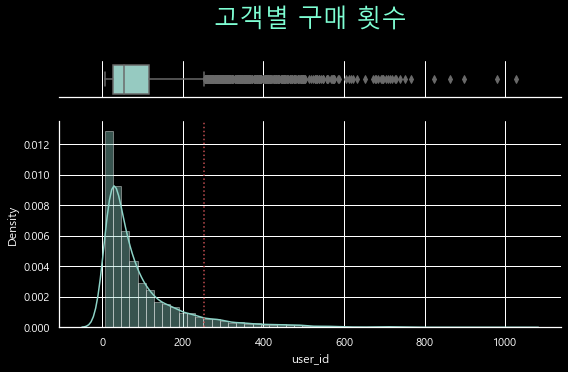

In [24]:
# (1) 전체 구매자 수
total_cnt = train2['user_id'].value_counts().count()
print(f'{color.BLUE}> 전체 구매자 수 {color.END}: {total_cnt:,}명\n')

# (2) Q0 ~ Q4
q0_q4 = train2['user_id'].value_counts().quantile([0,0.25,0.50,0.75,1]).astype(int).values
q0_q4_text = '(' + ', '.join(q0_q4.astype(str)) + ')'
print(f'{color.BLUE}> 고객별 구매 횟수 Q0-Q4 {color.END}: {q0_q4_text}')

# (3) Upper Whisker
from matplotlib.cbook import boxplot_stats
stats = boxplot_stats(train2['user_id'].value_counts())[0]
whislo, whishi = stats['whislo'], stats['whishi']
print(f'{color.BLUE}> 고객별 구매 횟수 Upper Whisker {color.END}: {whishi}\n')

stat = list(q0_q4)
stat.append(whishi)
stat.sort()

cnt_x = train2['user_id'].value_counts()

grp = ['0' if x<stat[1] else
       '1' if x<stat[2] else
       '2' if x<stat[3] else
       '3' if x<stat[4] else
       '4' if x<=stat[5] else
       'nan' for x in cnt_x]

# (4) 구간 별 구매자 수
print(f'{color.BLUE}> 고객별 평균 구매 횟수(구간){color.END}')
print(pd.Series(grp).value_counts().sort_index().rename(index={'0':'~Q1','1':'~Q2','2':'~Q3','3':'~Upper_Whisker','4':'~Q4'}))


# (5) 구매횟수 boxplot
def box_hist_plot(val,figsize,title='',title_size=20):
    
    f, (ax_box, ax_hist) = plt.subplots(2, 
                                        sharex=True,
                                        gridspec_kw={"height_ratios": (.15, .85)},
                                        figsize=figsize)

    sns.boxplot (val, ax=ax_box)
    sns.distplot(val, ax=ax_hist)

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    
    plt.axvline(x=stats['whishi'], color='r', linestyle=':')
    
    ax_box.set_xlabel('')
    ax_box.title.set_text(title)
    ax_box.title.set_size(title_size)
    ax_box.title.set_color('aquamarine')
    

box_hist_plot(train2['user_id'].value_counts(),
              figsize=(15*0.6,7*0.7),
              title='고객별 구매 횟수\n',
              title_size=25)
plt.show()

전체 구매자 수는 5,891명, 최소 6번, 최대 1,026번 구매함 <br>
한명의 사람이 많이 구매하는 경우가 있음 <br>
구매 횟수는 포아송분포를 따르는 것으로 보임 <br></br>

파생변수 : 구매 횟수에 대한 그룹 생성 (~Min / ~Q1 / ~Q2 / ~Q3 / ~Whishi / ~Q4)

<br></br>
#### 고객별 구매 금액의 평균

> 전체 평균 구매 금액 : 9264.0달러

> 고객별 평균 구매 금액 Q0-Q4 : (2319, 8287, 9386, 10655, 18578)달러
> 고객별 평균 구매 금액 Upper Whisker : 14201.1달러

> 고객별 평균 구매 횟수(구간)
~Q1               1473
~Q2               1472
~Q3               1474
~Upper_Whisker    1361
~Q4                111
dtype: int64 



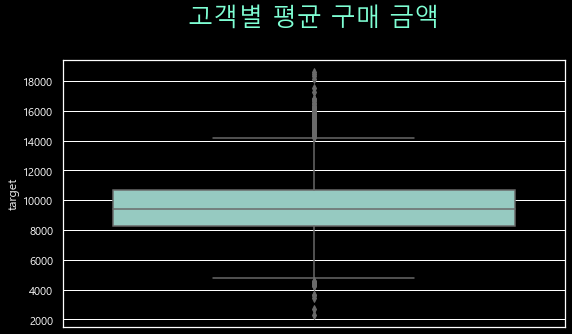

In [25]:
# (1) 전체 평균 구매금액
total_mean = train2['target'].mean()
print(f'{color.BLUE}> 전체 평균 구매 금액 {color.END}: {total_mean:.1f}달러\n')

# (2) Q0-Q4
sales_mean = train2.groupby(['user_id'])['target'].mean().reset_index()

sales_mean_quantile = sales_mean['target'].quantile([0,0.25,0.5,0.75,1]).values.round(0).astype(int)
sales_mean_quantile_text = ', '.join(sales_mean_quantile.astype(str))
print(f'{color.BLUE}> 고객별 평균 구매 금액 Q0-Q4 {color.END}: ({sales_mean_quantile_text})달러')

# (3) upper whisker보다 많이 구매한 사람
from matplotlib.cbook import boxplot_stats
stats = boxplot_stats(sales_mean['target'])[0]
whislo, whishi = stats['whislo'], stats['whishi']
print(f'{color.BLUE}> 고객별 평균 구매 금액 Upper Whisker {color.END}: {whishi:.1f}달러\n')

stat = list(sales_mean_quantile)
stat.append(whishi)
stat.sort()

grp = ['0' if x<stat[1] else
       '1' if x<stat[2] else
       '2' if x<stat[3] else
       '3' if x<stat[4] else
       '4' if x<=stat[5] else
       'nan' for x in sales_mean['target']]

# (4) 구간 별 구매자 수
print(f'{color.BLUE}> 고객별 평균 구매 횟수(구간){color.END}')
print(pd.Series(grp).value_counts().sort_index().rename(index={'0':'~Q1','1':'~Q2','2':'~Q3','3':'~Upper_Whisker','4':'~Q4'}),'\n')

# (5) 평균 구매금액 boxplot
fig = plt.figure(figsize=(15*0.6,7*0.7))
p = sns.boxplot(y=sales_mean['target'])
p.set_title('고객별 평균 구매 금액\n',fontsize=25,color='aquamarine')
plt.show()

<br></br>
#### 고객별 구매 금액의 Quantile

In [26]:
# (1) Q0 ~ Q4
df = train2.copy()

quantile_df = df.groupby(['user_id'])['target'].quantile(q=[0,0.25,0.50,0.75,1]).reset_index()
quantile_df['level_1'] = 'sales_by_user_q_' + (quantile_df['level_1']*100).astype(int).astype(str)

quantile_df = quantile_df.pivot_table(index='user_id',columns='level_1',values='target',fill_value=0,aggfunc=sum).reset_index()
quantile_df.rename_axis(None,axis=1)

# (2) mean

mean_df = df.groupby(['user_id'])['target'].mean().reset_index()
mean_df.rename(columns={'target':'sales_by_user_mean'},inplace=True)
mean_df

col = ['user_id']+['sales_by_user_' + x for x in ['q_0','q_25','q_50','mean','q_75','q_100']]
summary_df = pd.merge(quantile_df, mean_df, how='left', on='user_id')[col]

print(f'{color.BLUE}> 고객별 구매 금액의 Quantile {color.END}')
display(summary_df.head(5))

print(f'{color.BLUE}> 고객별 구매 금액 quantile의 median {color.END}\n')
print(summary_df.drop(['user_id'],axis=1).apply(lambda x:x.median()).round(1))

> 고객별 구매 금액의 Quantile 


,user_id,sales_by_user_q_0,sales_by_user_q_25,sales_by_user_q_50,sales_by_user_mean,sales_by_user_q_75,sales_by_user_q_100
0,1000001,612,7884.50,9946.0,9545.514286,12305.5,19219
1,1000002,119,7818.00,9899.0,10525.610390,11973.0,20657
2,1000003,3646,6953.00,12103.0,11780.517241,15592.0,19631
3,1000004,481,15488.50,15852.5,14747.714286,19087.0,19693
4,1000005,1938,4551.75,6168.0,7745.292453,8823.0,21021


> 고객별 구매 금액 quantile의 median 

sales_by_user_q_0        367.0
sales_by_user_q_25      6121.0
sales_by_user_q_50      8218.0
sales_by_user_mean      9386.2
sales_by_user_q_75     11990.0
sales_by_user_q_100    20469.0
dtype: float64


<br></br>
### prod_id

<br></br>
#### 제품별 구매 횟수

> 전체 제품 개수 : 3,631개

> 제품별 구매 횟수 Q0-Q4 : (1, 19, 71, 194, 1880)
> 제품별 구매 횟수 Upper Whisker : 451

> 제품별 구매 횟수(구간)
~Q1               876
~Q2               935
~Q3               905
~Upper_Whisker    612
~Q4               303
dtype: int64


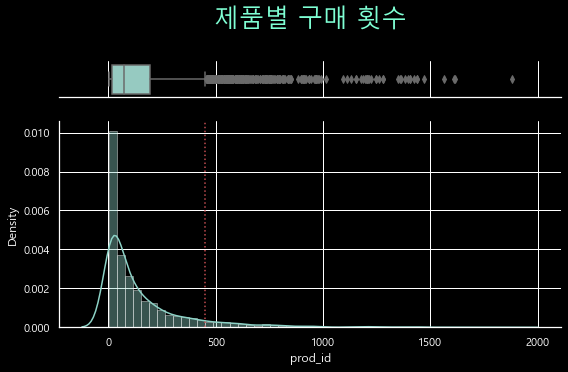

In [27]:
# (1) 전체 구매자 수
total_cnt = train2['prod_id'].value_counts().count()
print(f'{color.BLUE}> 전체 제품 개수 {color.END}: {total_cnt:,}개\n')

# (2) Q0 ~ Q4
q0_q4 = train2['prod_id'].value_counts().quantile([0,0.25,0.50,0.75,1]).astype(int).values
q0_q4_text = '(' + ', '.join(q0_q4.astype(str)) + ')'
print(f'{color.BLUE}> 제품별 구매 횟수 Q0-Q4 {color.END}: {q0_q4_text}')

# (3) Upper Whisker
from matplotlib.cbook import boxplot_stats
stats = boxplot_stats(train2['prod_id'].value_counts())[0]
whislo, whishi = stats['whislo'], stats['whishi']
print(f'{color.BLUE}> 제품별 구매 횟수 Upper Whisker {color.END}: {whishi}\n')

stat = list(q0_q4)
stat.append(whishi)
stat.sort()

cnt_x = train2['prod_id'].value_counts()

grp = ['0' if x<stat[1] else
       '1' if x<stat[2] else
       '2' if x<stat[3] else
       '3' if x<stat[4] else
       '4' if x<=stat[5] else
       'nan' for x in cnt_x]

# (4) 구간 별 구매자 수
print(f'{color.BLUE}> 제품별 구매 횟수(구간){color.END}')
print(pd.Series(grp).value_counts().sort_index().rename(index={'0':'~Q1','1':'~Q2','2':'~Q3','3':'~Upper_Whisker','4':'~Q4'}))


# (5) 구매횟수 boxplot
def box_hist_plot(val,figsize,title='',title_size=20):
    
    f, (ax_box, ax_hist) = plt.subplots(2, 
                                        sharex=True,
                                        gridspec_kw={"height_ratios": (.15, .85)},
                                        figsize=figsize)

    sns.boxplot (val, ax=ax_box)
    sns.distplot(val, ax=ax_hist)

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    
    plt.axvline(x=stats['whishi'], color='r', linestyle=':')
    
    ax_box.set_xlabel('')
    ax_box.title.set_text(title)
    ax_box.title.set_size(title_size)
    ax_box.title.set_color('aquamarine')
    

box_hist_plot(train2['prod_id'].value_counts(),
              figsize=(15*0.6,7*0.7),
              title='제품별 구매 횟수\n',
              title_size=25)
plt.show()

<br></br>
#### 제품별 구매 금액의 평균

> 전체 평균 구매 금액 : 9264.0달러

> 제품별 평균 구매 금액 Q0-Q4 : (37, 5386, 6943, 10154, 21257)달러
> 제품별 평균 구매 금액 Upper Whisker : 17298.1달러

> 제품별 평균 구매 횟수(구간)
~Q1               908
~Q2               908
~Q3               907
~Upper_Whisker    855
~Q4                53
dtype: int64 



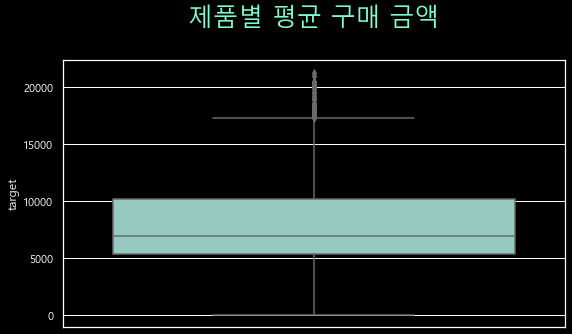

In [28]:
# (1) 전체 평균 구매금액
total_mean = train2['target'].mean()
print(f'{color.BLUE}> 전체 평균 구매 금액 {color.END}: {total_mean:.1f}달러\n')

# (2) Q0-Q4
sales_mean = train2.groupby(['prod_id'])['target'].mean().reset_index()

sales_mean_quantile = sales_mean['target'].quantile([0,0.25,0.5,0.75,1]).values.round(0).astype(int)
sales_mean_quantile_text = ', '.join(sales_mean_quantile.astype(str))
print(f'{color.BLUE}> 제품별 평균 구매 금액 Q0-Q4 {color.END}: ({sales_mean_quantile_text})달러')

# (3) upper whisker보다 많이 구매한 사람
from matplotlib.cbook import boxplot_stats
stats = boxplot_stats(sales_mean['target'])[0]
whislo, whishi = stats['whislo'], stats['whishi']
print(f'{color.BLUE}> 제품별 평균 구매 금액 Upper Whisker {color.END}: {whishi:.1f}달러\n')

stat = list(sales_mean_quantile)
stat.append(whishi)
stat.sort()

grp = ['0' if x<stat[1] else
       '1' if x<stat[2] else
       '2' if x<stat[3] else
       '3' if x<stat[4] else
       '4' if x<=stat[5] else
       'nan' for x in sales_mean['target']]

# (4) 구간 별 구매자 수
print(f'{color.BLUE}> 제품별 평균 구매 횟수(구간){color.END}')
print(pd.Series(grp).value_counts().sort_index().rename(index={'0':'~Q1','1':'~Q2','2':'~Q3','3':'~Upper_Whisker','4':'~Q4'}),'\n')

# (5) 평균 구매금액 boxplot
fig = plt.figure(figsize=(15*0.6,7*0.7))
p = sns.boxplot(y=sales_mean['target'])
p.set_title('제품별 평균 구매 금액\n',fontsize=25,color='aquamarine')
plt.show()

<br></br>
#### 제품별 구매 금액의 Quantile

In [29]:
# (1) Q0 ~ Q4
df = train2.copy()

quantile_df = df.groupby(['prod_id'])['target'].quantile(q=[0,0.25,0.50,0.75,1]).reset_index()
quantile_df['level_1'] = 'sales_by_prod_q_' + (quantile_df['level_1']*100).astype(int).astype(str)

quantile_df = quantile_df.pivot_table(index='prod_id',columns='level_1',values='target',fill_value=0,aggfunc=sum).reset_index()
quantile_df.rename_axis(None,axis=1)

# (2) mean

mean_df = df.groupby(['prod_id'])['target'].mean().reset_index()
mean_df.rename(columns={'target':'sales_by_prod_mean'},inplace=True)
mean_df

col = ['prod_id']+['sales_by_prod_' + x for x in ['q_0','q_25','q_50','mean','q_75','q_100']]
summary_df = pd.merge(quantile_df, mean_df, how='left', on='prod_id')[col]

print(f'{color.BLUE}> 고객별 구매 금액의 Quantile {color.END}')
display(summary_df.head(5))

print(f'{color.BLUE}> 고객별 구매 금액 quantile의 median {color.END}\n')
print(summary_df.drop(['prod_id'],axis=1).apply(lambda x:x.median()).round(1))

> 고객별 구매 금액의 Quantile 


,prod_id,sales_by_prod_q_0,sales_by_prod_q_25,sales_by_prod_q_50,sales_by_prod_mean,sales_by_prod_q_75,sales_by_prod_q_100
0,P00000142,2725,10591.75,10927.0,11143.642361,13379.25,13716
1,P00000242,3214,9588.00,10023.0,10551.851064,13029.00,16503
2,P00000342,1727,3702.75,5287.0,5313.422131,6928.75,8896
3,P00000442,1764,3599.75,5194.0,4795.358696,5394.75,8891
4,P00000542,1730,3750.00,5376.0,5417.530201,6955.00,8903


> 고객별 구매 금액 quantile의 median 

sales_by_prod_q_0      2099.0
sales_by_prod_q_25     5882.5
sales_by_prod_q_50     7058.0
sales_by_prod_mean     6942.7
sales_by_prod_q_75     8050.0
sales_by_prod_q_100    9990.0
dtype: float64


<br></br>
#### 제품별 구매 개수

In [30]:
summary_df['prod_ratio'] = summary_df['sales_by_prod_q_100'] / summary_df['sales_by_prod_q_0']

df = train2.copy()
df = pd.merge(df,summary_df,how='left',on='prod_id')

minmax_ratio = minmax(df['prod_ratio'])
print(f'{color.BLUE}> 제품별 구매금액의 min,max ratio의 최소/최대값 :\n{color.END} {minmax_ratio}\n')

lower_2 = cnt(cnt(df['prod_id'][df['prod_ratio']<2]).values())
print(f'{color.BLUE}> 제품별 구매금액의 min,max ratio가 2보다 작은 prod_id의 건수의 Freq. :\n{color.END} {lower_2}')

> 제품별 구매금액의 min,max ratio의 최소/최대값 :
 (1, 5)

> 제품별 구매금액의 min,max ratio가 2보다 작은 prod_id의 건수의 Freq. :
 Counter({1: 144, 2: 63, 4: 27, 3: 26, 6: 15, 5: 14, 7: 14, 8: 5, 9: 5, 16: 3, 11: 3, 15: 3, 14: 2, 28: 2, 12: 2, 13: 2, 10: 2, 24: 2, 23: 1, 209: 1, 73: 1, 25: 1, 54: 1, 20: 1, 19: 1})


제품별 구매금액이 5배까지 차이가 남 <br>
→ 제품별 구매개수는 알 수 없음 <br>
→ ratio(max/min)를 구매개수로 생각할 수 있음
<br></br>

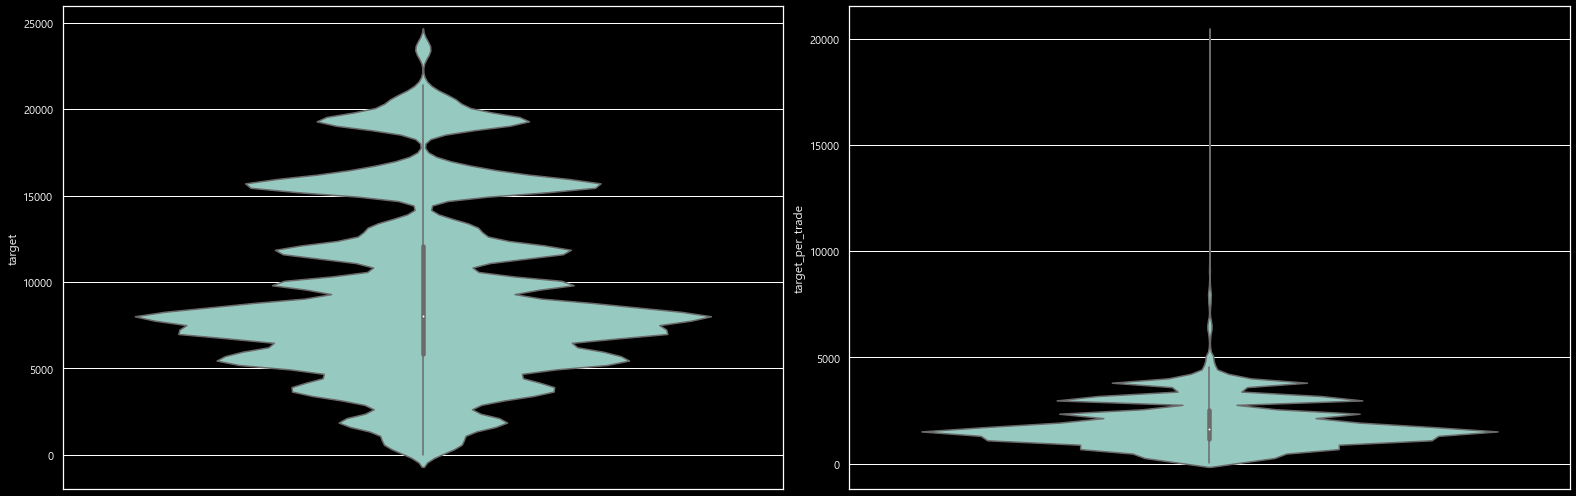

In [31]:
df['target'] = df['target']
df['target_per_trade'] = df['target'] / df['prod_ratio']

fig = plt.figure(figsize=(22,7))

fig.add_subplot(1,2,1)
sns.violinplot(y=df['target'])

fig.add_subplot(1,2,2)
sns.violinplot(y=df['target_per_trade'])

fig.tight_layout()
plt.show()

분포가 mixed normal에서 log-normal으로 바뀜
<br></br>

In [32]:
sub=df[df['user_id']=='1000001']
minmax(sub['prod_ratio'])
sub[['user_id','prod_id','prod_ratio']]

a = pd.DataFrame({
    'min' : df.groupby(['user_id'])['prod_ratio'].min(),
    'max' : df.groupby(['user_id'])['prod_ratio'].max(),
    'max/min' : df.groupby(['user_id'])['prod_ratio'].max() / df.groupby(['user_id'])['prod_ratio'].min(),
    'median' : df.groupby(['user_id'])['prod_ratio'].median(),
})

a

,min,max,max/min,median
user_id,,,,
1000001,2.356857,5.198830,2.205832,5.138124
1000002,2.550433,5.199587,2.038708,5.097068
1000003,4.489391,5.197837,1.157805,5.151452
1000004,4.975259,5.198628,1.044896,5.175444
1000005,1.657520,5.199773,3.137079,5.085712
...,...,...,...,...
1006036,1.624791,5.199587,3.200158,5.059166
1006037,2.433366,5.199587,2.136788,5.050241
1006038,4.456939,5.199066,1.166511,5.027859


user_id는 동일하니까, test에 구매개수의 중앙값을 join으로 붙이기
<br></br>

<br></br>
## 유형별 변수 개수 확인

In [33]:
# 숫자형변수, 문자형변수
num_vari  = [key for key in COL_TYPE.keys() if COL_TYPE[key] in [int,float]]
char_vari = [key for key in COL_TYPE.keys() if COL_TYPE[key] in [str      ]]

num_df  = train2[num_vari ]
char_df = train2[char_vari]

print('전체 변수 :', len(train2.columns))
print('숫자 변수 :', len(num_vari),  '\t:', num_vari)
print('문자 변수 :', len(char_vari), '\t:', char_vari)

전체 변수 : 12
숫자 변수 : 1 	: ['target']
문자 변수 : 11 	: ['age', 'city_cat', 'gender', 'marital', 'occupation', 'prod_cat_1', 'prod_cat_2', 'prod_cat_3', 'prod_id', 'stay_year', 'user_id']


<br></br>
## Characteristic Variable

In [34]:
max_unique = 5

plot_char_vari = sorted(list(set(char_vari)-set(['id'])))

max_char_len = max([len(var) for var in plot_char_vari])
for xvar in plot_char_vari:
    blank_var = ' '*(max_char_len-len(xvar))
    
    unique_val = sorted(train2[xvar].dropna().unique())
    if len(unique_val)>=max_unique:
        example = unique_val[:max_unique] + ['...']
    else:
        example = unique_val
    
    print(f'{xvar} {blank_var}: {example}')

age        : ['0-17', '18-25', '26-35', '36-45', '46-50', '...']
city_cat   : ['A', 'B', 'C']
gender     : ['F', 'M']
marital    : ['0', '1']
occupation : ['0', '1', '10', '11', '12', '...']
prod_cat_1 : ['1', '10', '11', '12', '13', '...']
prod_cat_2 : ['10', '11', '12', '13', '14', '...']
prod_cat_3 : ['10', '11', '12', '13', '14', '...']
prod_id    : ['P00000142', 'P00000242', 'P00000342', 'P00000442', 'P00000542', '...']
stay_year  : ['0', '1', '2', '3', '4+', '...']
user_id    : ['1000001', '1000002', '1000003', '1000004', '1000005', '...']


<br></br>
### 문자형 변수 짧게 변경

In [35]:
def char_short_to_long(_df):
    df = _df.copy()
    
    return df

train3 = char_short_to_long(train2)
test3  = char_short_to_long(test2)

<br></br>
### Plot : 1-Dimension

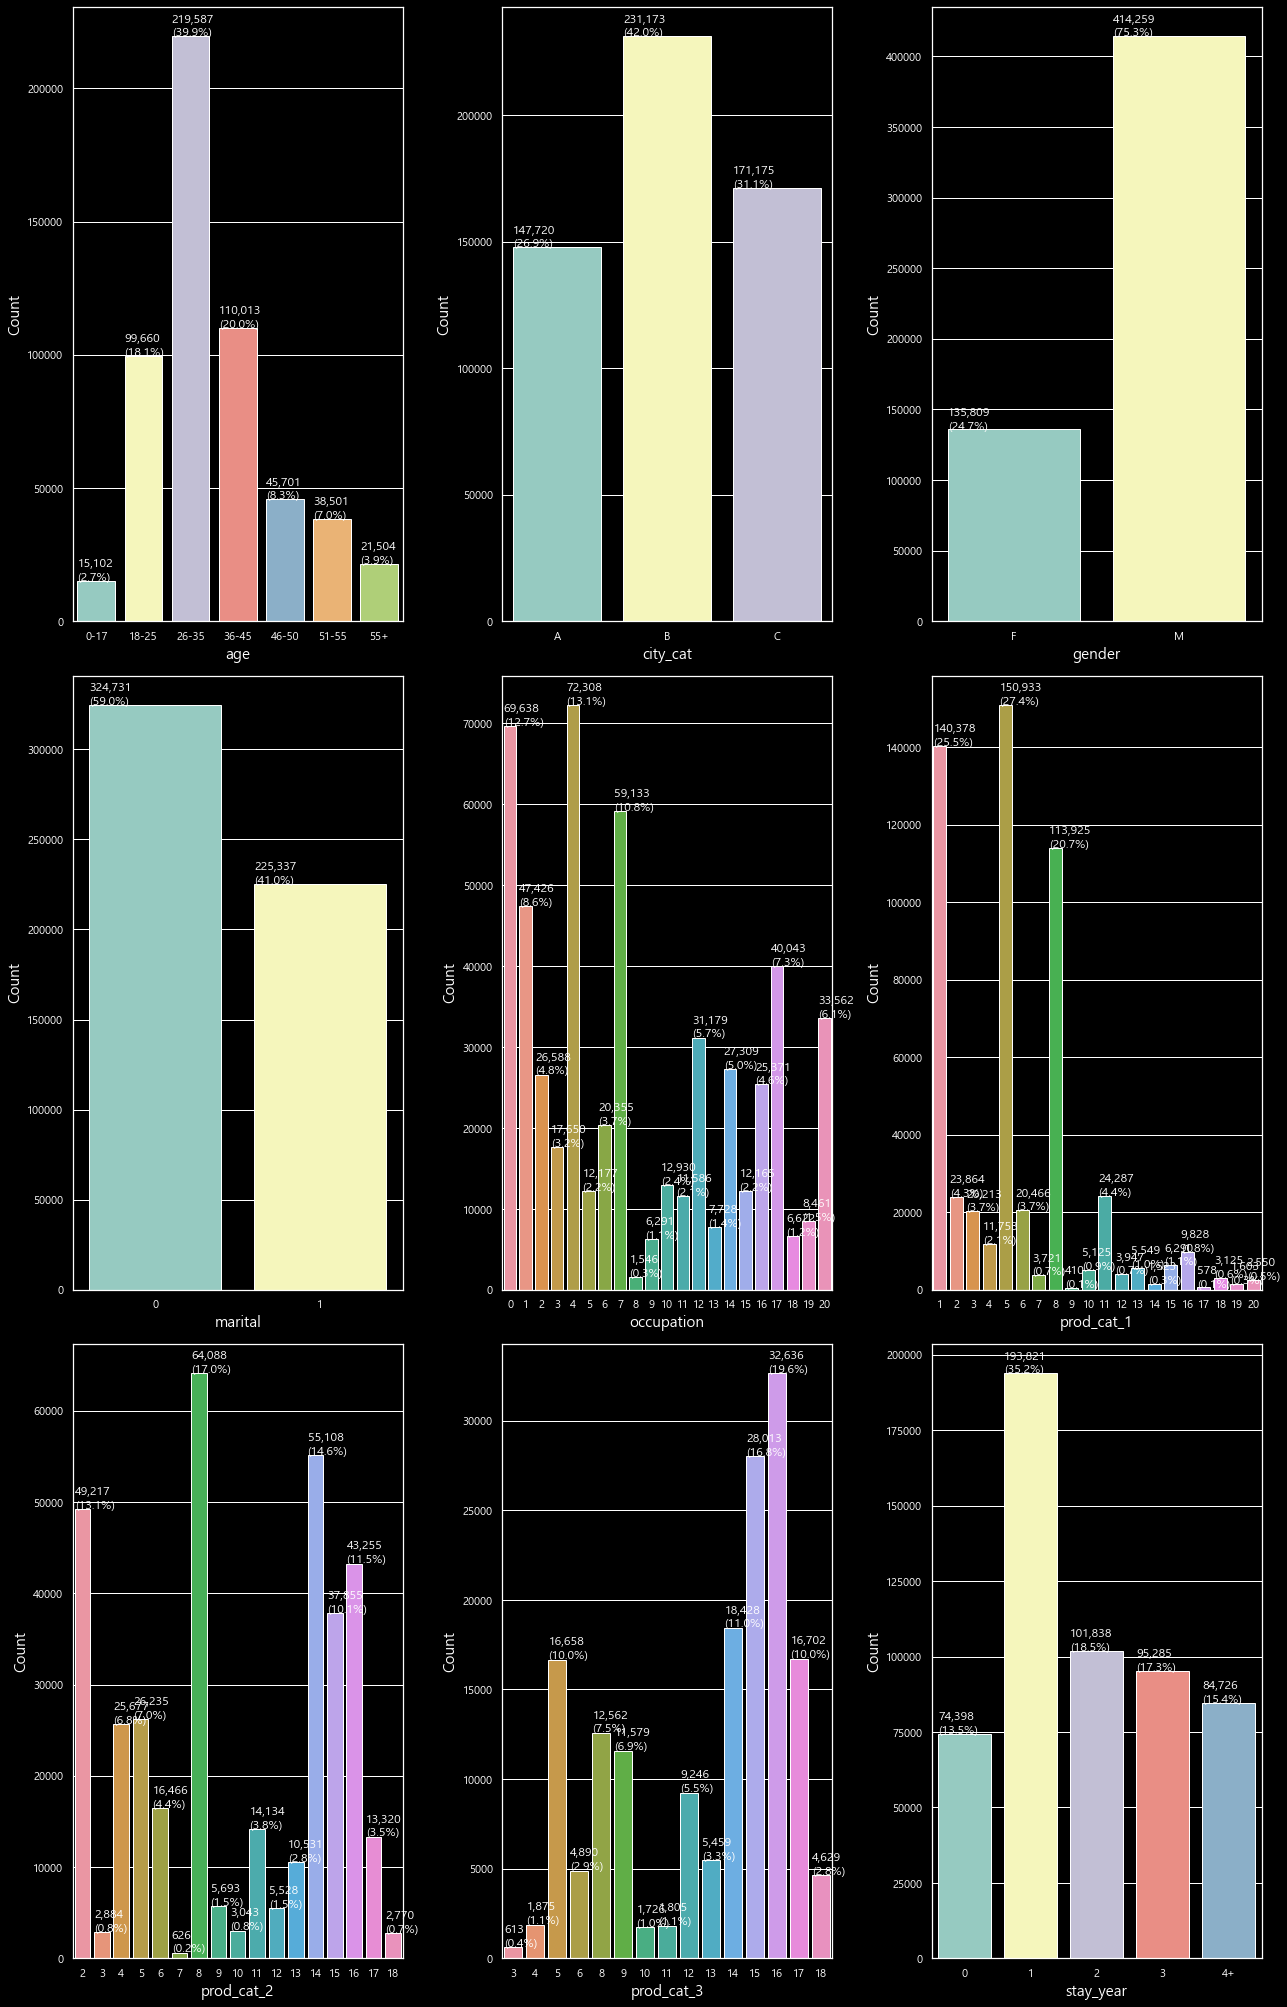

In [36]:
plot_char_vari = setdiff(plot_char_vari,['user_id','prod_id'])

fig = plt.figure(figsize=(15*1.2,7*4))
ncol = 3
nrow = np.ceil(len(plot_char_vari)/ncol)

iter=0
for var in sorted(plot_char_vari):
    iter+=1
    
    # ordering
    unique_x = train3[var].dropna().unique()
    try:
        order_x = [str(x) for x in sorted(unique_x.astype(int))]
    except ValueError:
        order_x = sorted(unique_x)
        
    fig.add_subplot(nrow,ncol,iter)
    ax = sns.countplot(train3[var],
                       order = order_x)
    ax.set_xlabel(var, size=15)
    ax.set_ylabel('Count',size=15)

    for p in ax.patches:
        count_x = p.get_height()
        sum_x   = sum([p.get_height() for p in ax.patches])
        ratio_x = ( p.get_height() / sum_x )*100
        ann_x   = f'{count_x:,}\n({ratio_x:.1f}%)'
        ax.annotate(ann_x, (p.get_x() + 0.0, p.get_height() +50), size = 12, color='white')
    
fig.tight_layout()
plt.show()

|변수명 | 정보 |
|:---:|:---|
| age | 미성년자의 비중이 적음, 26-35세의 비중이 제일 큼, 18-45세의 비중이 78%로 매우 높음 |
| city_cat | B의 비중이 제일 높음. B>C>A의 순서 |
| gender | 남자고객의 비중이 75%로 매우 높음 |
| marital | 기혼이 41%, 미혼이 59% |
| occupation | 빈도가 높은 0,4,7 등의 경우는 무직,학생,주부,회사원과 같은 일반적인 카테고리일 가능성이 높음 <br> 이런 카테고리는 일반 구매자일 가능성이 높고, count가 낮은 카테고리들은 법인일 가능성이 있음 <br> -> 카테고리 별 구매금액 확인 및 clustering을 해보는것도 좋을 것 같음 |
| prod_cat_1 | 1,5,8번의 경우에는 잘팔리는 것들(major), 나머지는 minor한 것들 <br> prod_cat_2,3에 비해서 분명하게 나뉘는 것들이 많음 |
| prod_cat_2 | ... |
| prod_cat_3 | ... |
| stay_year | 현재도시에 체류한 기간이 1년인게 1/3로 가장 많고, 나머지는 비슷한 수준 |


<br></br>
### Plot : 2-Dimension

문자열 조합의 개수

In [37]:
n_comb = math.comb(len(plot_char_vari),2)
ncol = math.ceil(np.sqrt(n_comb))
nrow = math.ceil(n_comb/ncol)

print(f'n_comb : {n_comb}, (nrow,ncol) : ({nrow},{ncol})')

n_comb : 36, (nrow,ncol) : (6,6)


<br></br>
그룹이 많은 prod_cat은 빼고 확인

In [38]:
check_var = setdiff(plot_char_vari,['prod_cat_1','prod_cat_2','prod_cat_3'])
n_comb = math.comb(len(check_var),2)

ncol = math.ceil(np.sqrt(n_comb))
nrow = math.ceil(n_comb/ncol)

comb = list(itertools.product([True, False], repeat=len(check_var)))
comb = [x for x in comb if sum(x)==2]

for iter,c in enumerate(comb):
    xvar,yvar = np.array(check_var)[[c]]
    print(color.BOLD+color.BLUE+f'> ({iter+1}/{len(comb)}) ({xvar},{yvar})'+color.END)
    
    View(pd.crosstab(train3[xvar].fillna('nan'),
                     train3[yvar].fillna('nan')))
    print('\n')

> (1/15) (city_cat,stay_year)
stay_year      0      1      2      3     4+
city_cat                                    
A          24178  49305  27114  24804  22319
B          28687  83413  41772  42691  34610
C          21533  61103  32952  27790  27797


> (2/15) (city_cat,gender)
gender        F       M
city_cat               
A         35704  112016
B         57796  173377
C         42309  128866


> (3/15) (city_cat,occupation)
occupation      0      1    10    11     12    13     14    15     16     17    18    19      2     20     3      4     5      6      7    8     9
city_cat                                                                                                                                          
A           18858  12809  2226  2470   7080   393   7745  3035   6095   8177  1605  2236   9232  12743  5645  24205  2383   3755  16216  104   708
B           29850  19756  4230  5595  13184  2392  11256  5262  10879  16111  2126  3400  11366  14400  6905  29854  6615 

<br></br>
prod_cat_2,3의 missing을 채우기 위해서 확인

In [39]:
except_prod_1 = setdiff(plot_char_vari,['prod_cat_1'])

for iter,var in enumerate(except_prod_1):
    xvar = var
    yvar = 'prod_cat_1'
    print(color.BOLD+color.BLUE+f'> ({iter+1}/{len(except_prod_1)}) ({xvar})'+color.END)
    
    View(pd.crosstab(train3[xvar].fillna('nan'),
                     train3[yvar].fillna('nan')))
    print('\n')

> (1/8) (prod_cat_3)
prod_cat_1      1    10     11    12    13    14    15    16   17    18    19     2    20     3     4       5      6     7       8    9
prod_cat_3                                                                                                                             
10              0     0      0     0     0     0     0     0    0     0     0   989     0     0     0       0    737     0       0    0
11           1588     0      0     0     0     0     0     0    0     0     0     0     0     0     0     217      0     0       0    0
12           1091     0      0     0     0     0     0     0    0     0     0   438     0  4707  1190    1820      0     0       0    0
13           2106     0      0     0     0     0     0     0    0     0     0     0     0     0   113     601   2639     0       0    0
14           6429     0      0     0     0     0     0     0    0     0     0  1686     0     0     0    8660   1104     0     549    0
15          21748     0    

prod_cat_1      1    10    11    12    13   14    15    16   17    18   19     2   20     3     4      5     6     7      8    9
age                                                                                                                             
0-17         3585   111   740   125   112   39   160   229    6    27   59   805   90  1200   758   4330   399    53   2258   16
18-25       26962   603  4597   439   756  230  1024  1598   41   339  275  4428  469  4710  2463  28522  3749   481  17911   63
26-35       58249  1787  9874  1096  2096  564  2372  4118  127  1042  563  8928  898  7662  4192  61473  8485  1651  44256  154
36-45       27648  1235  4953   994  1250  312  1395  1955  135   702  320  4912  506  3854  2354  29377  3899   809  23296  107
46-50       10474   520  2104   520   551  149   602   879   95   351  149  2105  227  1376   990  11971  1622   327  10656   33
51-55        9049   519  1458   433   483  154   508   672  107   423  134  1781  200   924   678

별다른 큰 패턴이 보이지 않음.. → ML로 결측값을 채워넣거나, 삭제
<br></br>

모든 문자형변수 조합의 2D plot <br>
각 변수의 그룹의 개수가 많아서 지저분해보임 → 주석처리

In [40]:
# if PLOT:

#     check_var = setdiff(plot_char_vari,['prod_cat_1','prod_cat_2','prod_cat_3'])
    
#     n_comb = math.comb(len(check_var),2)

#     ncol = math.ceil(np.sqrt(n_comb))
#     nrow = math.ceil(n_comb/ncol)

#     comb = list(itertools.product([True, False], repeat=len(check_var)))
#     comb = [x for x in comb if sum(x)==2]

#     fig  = plt.figure(figsize=(15*3,7*4))

#     tick_size      = 40
#     label_size     = 40
#     freq_font_size = 30
#     title_size     = 50
#     legend_size    = 30

#     p1_iter = 0
#     change_row = 0
#     for iter,c in enumerate(comb):

#         if change_row==(ncol):
#             change_row  = 1 # go back
#             p1_iter    += ncol+1
#         else:
#             change_row += 1
#             p1_iter    += 1

#         p2_iter = p1_iter+ncol

#         # # check
#         # print(f'change_row : {change_row}, p1_iter : {p1_iter}, p2_iter : {p2_iter}')

#         xvar,yvar = np.array(check_var)[[c]]

#         # (1) crosstab plot
#         fig.add_subplot(2*nrow, ncol, p1_iter)
#         ct = pd.crosstab(train3[xvar],train3[yvar]).sort_index(level=0, ascending=True).sort_index(level=1, ascending=True)
#         p0 = sns.heatmap(ct.T, annot=True, fmt='.0f', cbar=False, annot_kws={"size": freq_font_size}, cmap='YlGnBu')
#         p0.tick_params(axis = 'y', labelsize=tick_size)
#         p0.tick_params(axis = 'x', labelsize=0)
#         p0.set_title('-'*27 + f'{iter+1}' + '-'*27,fontsize=title_size)
#         p0.set_xlabel('')
#         p0.set_ylabel(f'{yvar}',fontsize=label_size)

#         # (2) count plot
#         fig.add_subplot(2*nrow, ncol, p2_iter)
#         p1 = sns.countplot(train3[xvar], hue = train3[yvar], dodge=True, palette = 'Set1',
#                            order     = sorted(train3[xvar].value_counts().index),
#                            hue_order = sorted(train3[yvar].value_counts().index))
#         p1.tick_params(labelsize=tick_size)
#         p1.set_xlabel(f'{xvar}',fontsize=label_size)
#         p1.set_ylabel('Count',fontsize=label_size)
#         p1.get_legend().remove()
#         #plt.legend(bbox_to_anchor=(1.02, 1), 
#         #           loc=2, borderaxespad=0, fontsize=legend_size)

# #         # show freq. into plot
# #         values=train3[xvar].value_counts().values
# #         for j, g1 in enumerate(p1.patches):
# #             p1.annotate(f'\n{g1.get_height()}', (g1.get_x()+0.13, g1.get_height()+1.1), ha='center', va='top', color='white', size=freq_font_size)

#     fig.tight_layout()
#     plt.show()

<br></br>
## Numeric Variable

In [41]:
round(train3.describe(),1)

,target
count,550068.0
mean,9264.0
std,5023.1
min,12.0
25%,5823.0
50%,8047.0
75%,12054.0
max,23961.0


숫자형변수는 target 밖에 없음

<br></br>
### Plot : 1-Dimension

#### Boxplot

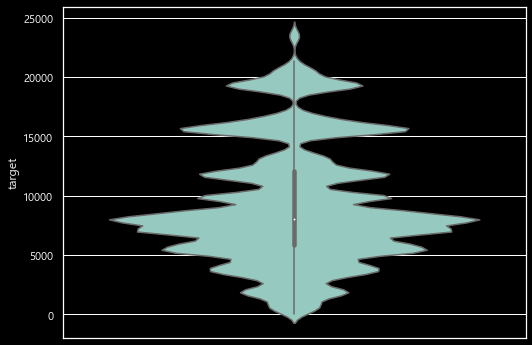

In [42]:
fig = plt.figure(figsize=(15*0.5,7*0.7))

# len(num_vari) : 6

nrow = 1
ncol = 1

if PLOT:
    
    for iter,var in enumerate(num_vari,1):
        fig.add_subplot(nrow,ncol,iter)
        sns.violinplot(y=train3[var])
    
    fig.tight_layout()
    plt.show()

<br></br>
#### hist + kde plot (hue=target)
<br></br>
각 숫자형변수별 분포 확인 & target에 따른 분포확인

> No Group


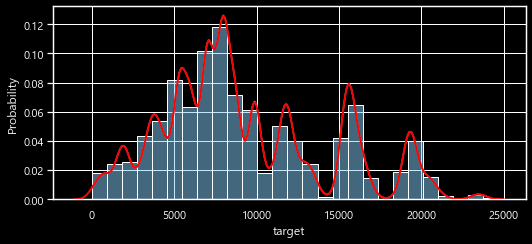

In [43]:
if PLOT:

    # No hue
    print(color.BOLD + color.BLUE + '> No Group' + color.END)
    density_plot(train3,
                 vars = sorted(set(num_vari) - set(['id'])),
                 binwidth_adj_ratio = 0.8,
                 figsize = (15*0.5,7*0.5))
    plt.show()

#     # hue : target
#     print(color.BOLD + color.BLUE + '> Group by Target' + color.END)
#     density_plot(train,
#                  vars = set(num_vari) - set(['id']),
#                  hue = 'target',
#                  binwidth_adj_ratio = 0.8)
#     plt.show()

몇가지 정규분포가 섞여 있는 것으로 보임

<br></br>
### Plot : 2-Dimension

<br></br>
#### Pairplot

숫자형 변수가 target 하나라서 주석처리

In [44]:
# if PLOT:

#     pairplot_df = num_df.copy()

#     sns.pairplot(pairplot_df, corner=True)#, hue = 'target')
#     plt.show()

<br></br>
#### Clustermap

숫자형 변수가 target 하나라서 주석처리

In [45]:
# if PLOT:

#     pairplot_df = num_df.copy()
    
#     sns.clustermap(pairplot_df.corr(), annot=True, cmap = 'RdYlBu_r')
#     plt.show()

<br></br>
## Numeric Variable * Characteristic Variable

<br></br>
### train

<br></br>
데이터 크기가 커서 너무 오래걸림 → 주석처리

In [46]:
# if PLOT:

#     for _iter,_col in enumerate(sorted(plot_char_vari)):
#         plot_num(grp_var = _col, num_vari = num_vari, #hue_var='target',
#                  df = train3,
#                  title_text = str(_iter+1) + '. ' + _col,
#                  figsize_1=(5,4),
#                  figsize_2=(15*0.8,7*0.8))

<br></br>
boxplot만 확인

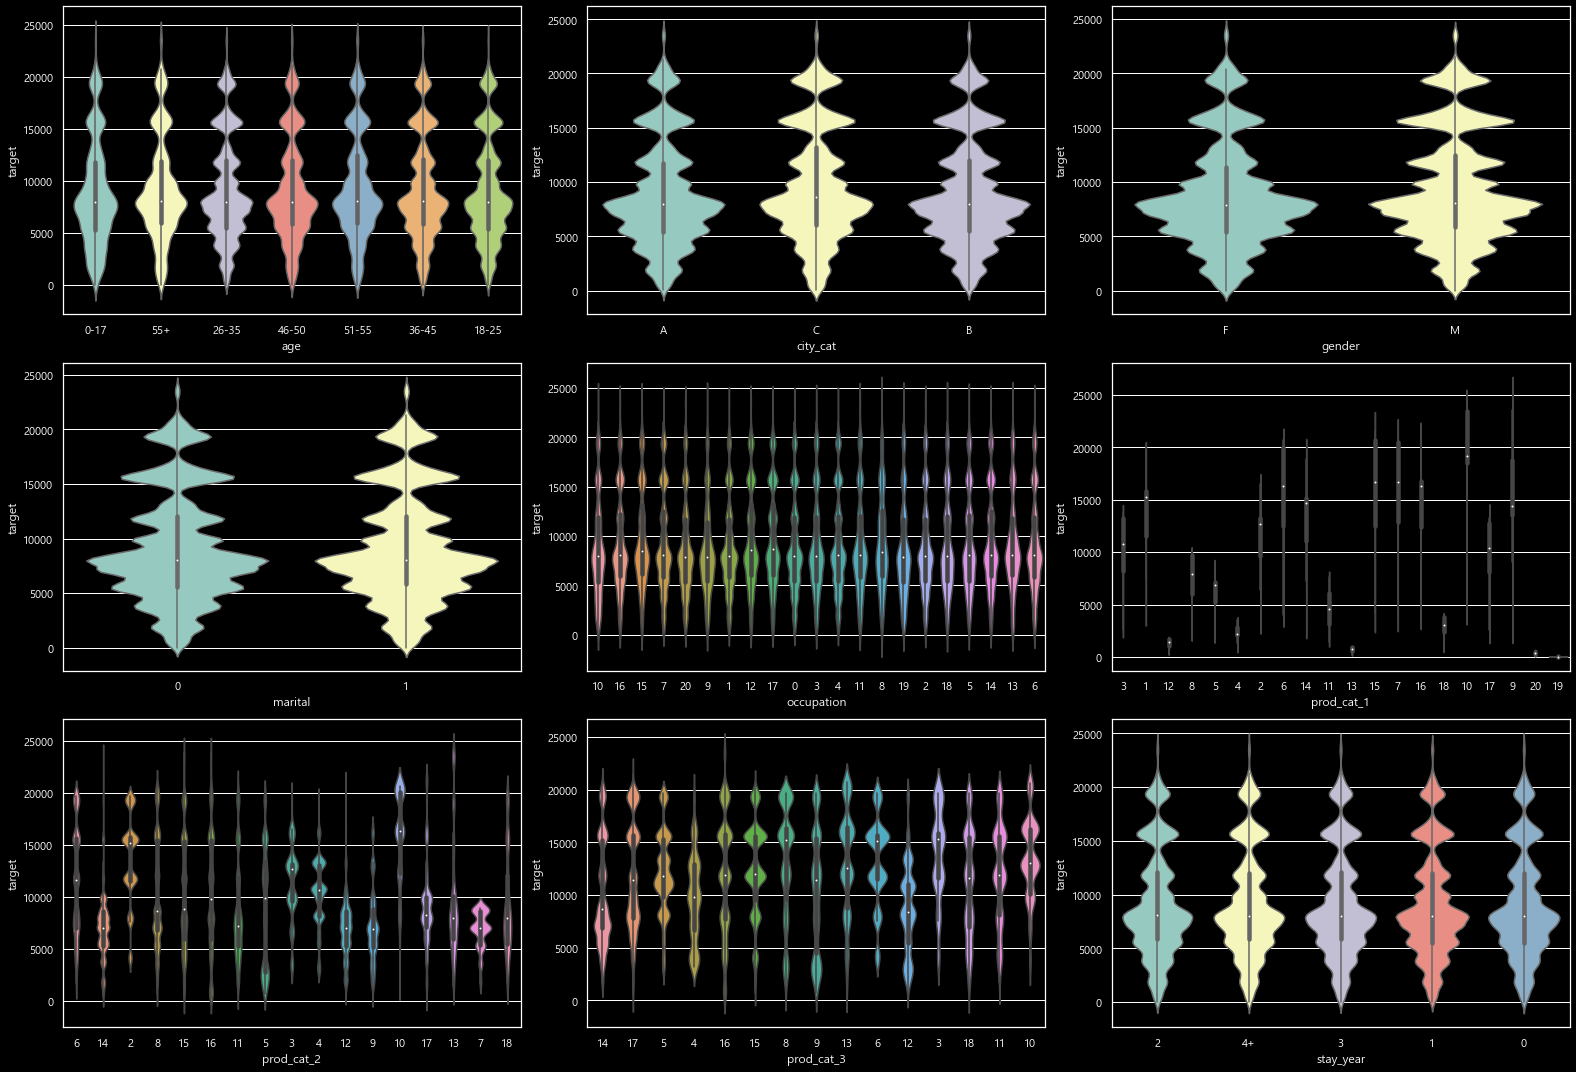

In [47]:
yvar = 'target'
fig = plt.figure(figsize=(22,15))

nrow = np.ceil(np.sqrt(len(plot_char_vari)))
ncol = np.ceil(len(plot_char_vari)/nrow)

for iter,xvar in enumerate(sorted(plot_char_vari)):

    fig.add_subplot(nrow,ncol,iter+1)
    sns.violinplot(x=train3[xvar],y=train3[yvar])
    
plt.tight_layout()
plt.show()

|변수명|변수정보|
|---|---|
| stay_year, age, marital, occupation | 구매금액차이가 큰 차이가 없음 |
| city_cat, gender | 매우 조금 차이가 있음 |
| prod_cat | 큰 차이가 있음 |

<br></br>
### test

In [48]:
# if PLOT:

#     for _iter,_col in enumerate(sorted(plot_char_vari)):
#         plot_num(grp_var = _col, num_vari = list(set(num_vari)-set(['body_mass'])), #hue_var='target',
#                  df = test3,
#                  title_text = str(_iter+1) + '. ' + _col)

<br></br>
># **Grouping**


prod_cat_1,2,3의 경우 카테고리가 너무 많음. 이를 그룹핑

<br></br>
## prod_cat_1

<br></br>
### prod_cat_1 그룹별 median 기준

In [49]:
q = train3['target'].quantile([0.25,0.50,0.75])
    
from matplotlib.cbook import boxplot_stats
stats = boxplot_stats(train3['target'])[0]
whislo, whishi = stats['whislo'], stats['whishi']

stat = list(q.values) + [whishi]
stat.sort()

prod_cat_1_grp = [np.nan    if med is np.nan else
                  '~q1'     if med<stat[0] else
                  '~q2'     if med<stat[1] else
                  '~q3'     if med<stat[2] else
                  '~whishi' if med<stat[3] else
                  '~q4'     for med in train3.groupby(['prod_cat_1'])['target'].median()]

grp_df = pd.DataFrame({
    'grp' : prod_cat_1_grp,
    'prod_cat_1' : train3['prod_cat_1'].unique()
}).sort_values(['grp','prod_cat_1'])

max_char_len = max([len(x) for x in grp_df['grp'].unique()])
for uniq in grp_df['grp'].unique():
    n_blank = ' '*(max_char_len-len(uniq))
    
    value = grp_df['prod_cat_1'][grp_df['grp']==uniq]
    value = ', '.join(value)
    
    print(f'{uniq}{n_blank} : ({value})')

~q1     : (11, 12, 13, 18, 5, 7, 8)
~q2     : (10, 20)
~q3     : (14, 16)
~whishi : (1, 15, 17, 19, 2, 3, 4, 6, 9)


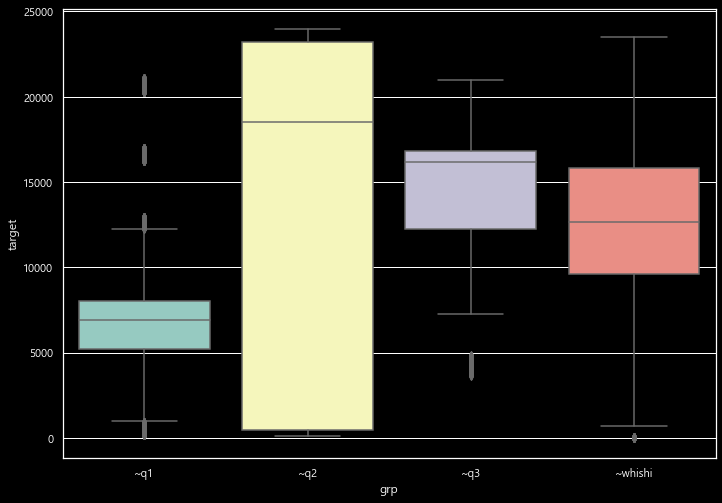

In [50]:
grp_fn = pd.merge(train3,grp_df,how='left',on='prod_cat_1')
pd.crosstab(grp_fn['prod_cat_1'],grp_fn['grp'])

sns.boxplot(grp_fn['grp'],grp_fn['target'],
            order = sorted(grp_fn['grp'].unique()))
plt.show()

~q2를 제외하고는 괜찮은 것 같은데, ~q2가 너무 많은 범위를 차지하고 있음

<br></br>
### 제품별 구매 개수를 고려

In [51]:
df = train3.copy()
df = pd.merge(df,summary_df,how='left',on='prod_id')

df['target_per_trade'] = df['target'] / df['prod_ratio']


q = df['target_per_trade'].quantile([0.25,0.50,0.75])

from matplotlib.cbook import boxplot_stats
stats = boxplot_stats(df['target_per_trade'])[0]
whislo, whishi = stats['whislo'], stats['whishi']

stat = list(q.values) + [whishi]
stat.sort()


prod_cat_1_grp = [np.nan    if med is np.nan else
                  '~q1'     if med<stat[0] else
                  '~q2'     if med<stat[1] else
                  '~q3'     if med<stat[2] else
                  '~whishi' if med<stat[3] else
                  '~q4'     for med in df.groupby(['prod_cat_1'])['target_per_trade'].median()]

grp_df = pd.DataFrame({
    'grp' : prod_cat_1_grp,
    'prod_cat_1' : df['prod_cat_1'].unique()
}).sort_values(['grp','prod_cat_1'])

max_char_len = max([len(x) for x in grp_df['grp'].unique()])
for uniq in grp_df['grp'].unique():
    n_blank = ' '*(max_char_len-len(uniq))
    
    value = grp_df['prod_cat_1'][grp_df['grp']==uniq]
    value = ', '.join(value)
    
    print(f'{uniq}{n_blank} : ({value})')

~q1     : (11, 12, 13, 18, 5, 7, 8)
~q2     : (10, 20)
~q3     : (15, 16)
~whishi : (1, 14, 17, 19, 2, 3, 4, 6, 9)


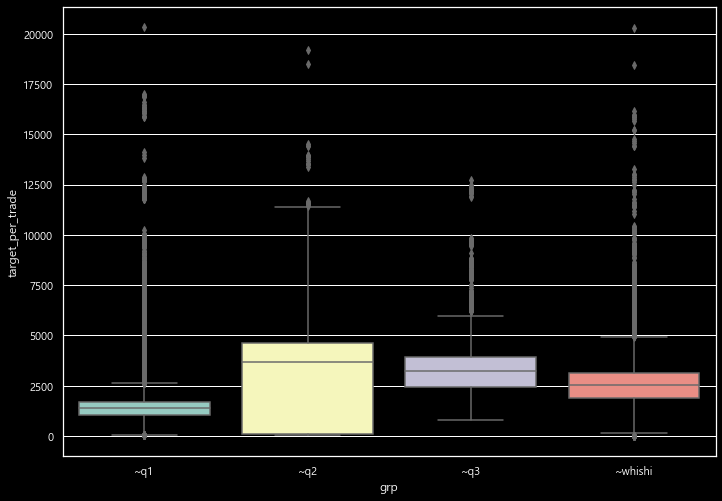

In [52]:
grp_fn = pd.merge(df,grp_df,how='left',on='prod_cat_1')

pd.crosstab(grp_fn['prod_cat_1'],grp_fn['grp'])

sns.boxplot(grp_fn['grp'],grp_fn['target_per_trade'],
            order = sorted(grp_fn['grp'].unique()))
plt.show()

<br></br>
### EDA에 근거

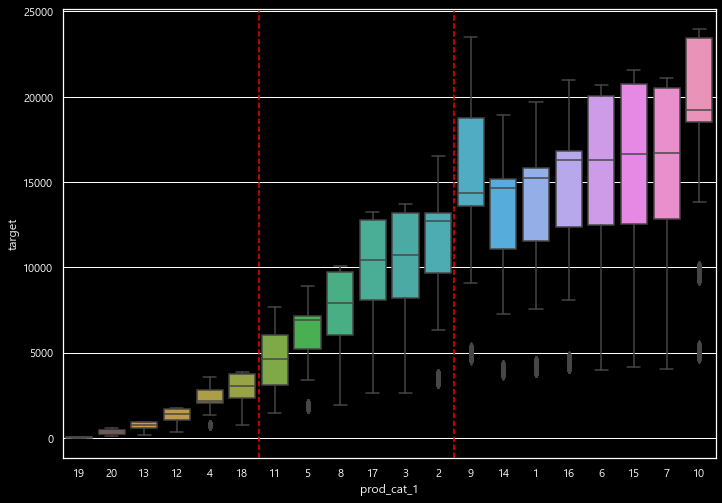

In [53]:
sns.boxplot(grp_fn['prod_cat_1'],grp_fn['target'],
            order = grp_fn.groupby('prod_cat_1')['target'].median().sort_values().index)

# [str(x) for x in sorted(train4['prod_cat_1'].unique().astype(int))]

plt.axvline(x=5.5 ,color='red',linestyle='--')
plt.axvline(x=11.5,color='red',linestyle='--')

plt.show()

\> 저가 순서대로 <br>
(1) 19,20,13,12,4,18 <br>
(2) 11,5,8,17,3 <br>
(3) 2,9,14,1,16,6,15,7,10 <br>
<br></br>

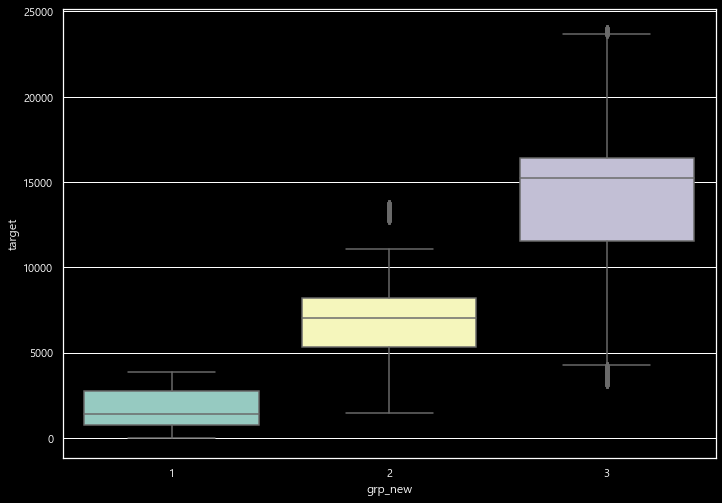

In [54]:
grp_fn['grp_new'] = ['1' if p in (19,20,13,12,4,18)      else
                     '2' if p in (11,5,8,17,3)           else
                     '3' if p in (2,9,14,1,16,6,15,7,10) else
                     'error' for p in grp_fn['prod_cat_1'].astype(int)]

sns.boxplot(x=grp_fn['grp_new'],y=grp_fn['target'],
            order = [str(x) for x in sorted(grp_fn['grp_new'].astype(int).unique())])
plt.show()

가격순서대로 적당히 나뉘는 느낌임
<br></br>

구매개수 고려해서 확인 → outlier가 많아서 의미없어보임

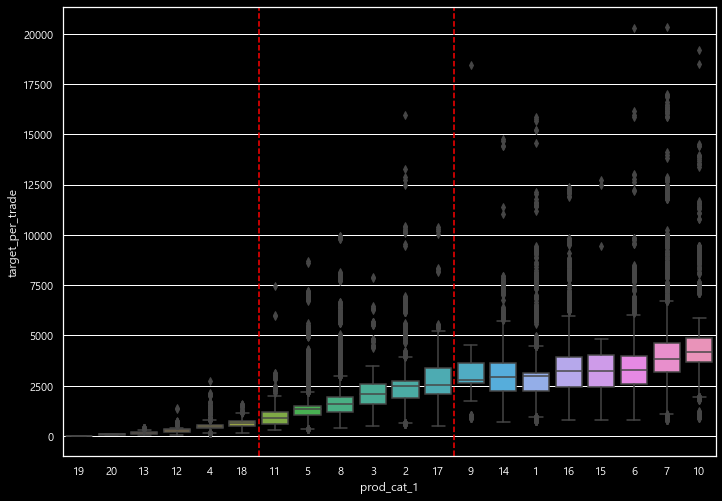

In [55]:
sns.boxplot(grp_fn['prod_cat_1'],grp_fn['target_per_trade'],
            order = grp_fn.groupby('prod_cat_1')['target_per_trade'].median().sort_values().index)

# [str(x) for x in sorted(train4['prod_cat_1'].unique().astype(int))]

plt.axvline(x=5.5 ,color='red',linestyle='--')
plt.axvline(x=11.5,color='red',linestyle='--')

plt.show()

In [56]:
grp_1 = ['1' if p in (19,20,13,12,4,18)      else
         '2' if p in (11,5,8,17,3)           else
         '3' if p in (2,9,14,1,16,6,15,7,10) else
         'error' for p in train3['prod_cat_1'].astype(int)]

grp_2 = ['1' if p in (11,12,13,18,5,7,8)     else
         '2' if p in (10,20)                 else
         '3' if p in (15,16)                 else
         '4' if p in (1,14,17,19,2,3,4,6,9)  else
         'error' for p in train3['prod_cat_1'].astype(int)]

# pd.crosstab(np.array(grp_1),np.array(grp_2))
# pd.crosstab(np.array(grp_1),train3['prod_cat_2'])

<br></br>
## prod_cat_2

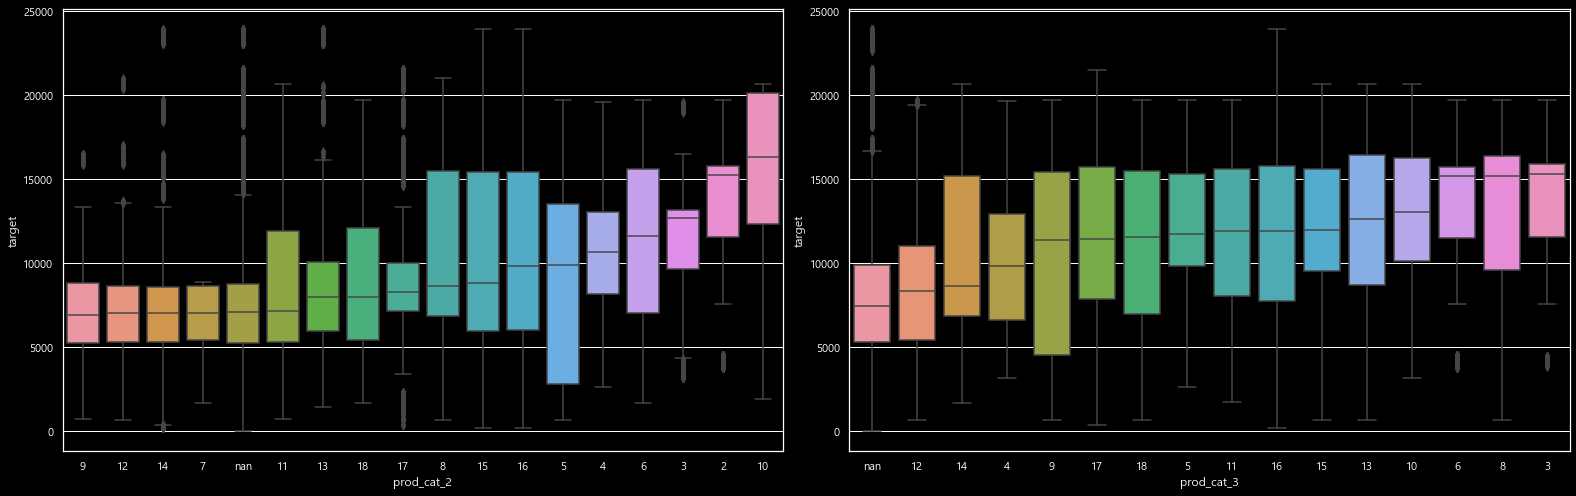

In [57]:
var_list = ['prod_cat_2','prod_cat_3']

fig = plt.figure(figsize=(22,7))
iter = 0
for var in var_list:

    iter += 1
    fig.add_subplot(1,2,iter)
    df = train3.copy()
    df[var] = df[var].fillna('nan')

    # df = df[df['prod_cat_1']=='2']
    # print(df.shape)

    sns.boxplot(x=df[var],
                y=df['target'],
                order=list(df.groupby(var)['target'].median().sort_values().index))
    
fig.tight_layout()
plt.show()

구분은 있는데 나누기 힘듬 → nan을 0으로 넣기

<br></br>
># **Preprocessing**

In [92]:
def preprocessing(_train, _test):

    from matplotlib.cbook import boxplot_stats

    tr_df = _train.copy()
    te_df = _test .copy()

    #------------------------------------------------------------#
    # 1. prod_cat_2,3 : nan to 0
    #------------------------------------------------------------#
    tr_df['prod_cat_2'] = tr_df['prod_cat_2'].fillna('0')
    tr_df['prod_cat_3'] = tr_df['prod_cat_3'].fillna('0')

    te_df['prod_cat_2'] = te_df['prod_cat_2'].fillna('0')
    te_df['prod_cat_3'] = te_df['prod_cat_3'].fillna('0')

    #------------------------------------------------------------#
    # 2. prod_id : 8자리인 것들 수정
    #------------------------------------------------------------#
    tr_df['prod_id'] = [x if len(x) == 9 else
                        x[:1] + '0' + x[1:]
                        for x in tr_df['prod_id']]
    te_df['prod_id'] = [x if len(x) == 9 else
                        x[:1] + '0' + x[1:]
                        for x in te_df['prod_id']]

    #-------------------------------------------------------------------------------------#
    # 3. 고객별 구매건수 : user_id는 train,test 동일하므로 train에서 가져오기
    #-------------------------------------------------------------------------------------#
    tr_user_cnt_df = pd.DataFrame({
        'user_id': tr_df['user_id'].value_counts().index,
        'user_cnt': tr_df['user_id'].value_counts().values
    })

    tr_df = pd.merge(tr_df, tr_user_cnt_df, how='left', on='user_id')
    te_df = pd.merge(te_df, tr_user_cnt_df, how='left', on='user_id')

    #-------------------------------------------------------------------------------------#
    # 4. 제품별 구매건수 : prod_id는 안겹치는것도 있으니까,
    #                      겹치는거는 가져오고, 안겹치는거는 test에 대해서 만듦
    #-------------------------------------------------------------------------------------#
    # train의 prod_cnt 계산
    tr_prod_cnt_df = pd.DataFrame({
        'prod_id': tr_df['prod_id'].value_counts().index,
        'prod_cnt': tr_df['prod_id'].value_counts().values
    })

    # test가 train에 겹치지 않는 부분 location 확인
    tr_df = pd.merge(tr_df, tr_prod_cnt_df, how='left', on='prod_id')
    te_df = pd.merge(te_df, tr_prod_cnt_df, how='left', on='prod_id')

    # test가 train에 겹치는 부분은 train의 cnt를 가져오고,
    #                겹치지 않는 부분은 test의 cnt를 가져옴
    prod_cnt_null_loc = te_df['prod_cnt'].isnull()
    te_prod_cnt_df = pd.DataFrame({
        'prod_id': te_df['prod_id'][prod_cnt_null_loc].value_counts().index,
        'prod_cnt': te_df['prod_id'][prod_cnt_null_loc].value_counts().values
    })

    tr_te_prod_cnt_df = pd.concat(
        [tr_prod_cnt_df, te_prod_cnt_df], axis=0).reset_index(drop=True)
    tr_te_prod_cnt_df

    te_df = pd.merge(te_df.drop(['prod_cnt'], axis=1),
                     tr_te_prod_cnt_df, how='left', on='prod_id')

    #-------------------------------------------------------------------------------------#
    # 5. 고객별 구매건수 그룹 : user_id는 train,test 동일하므로 train에서 가져오기
    #-------------------------------------------------------------------------------------#
    stats = boxplot_stats(tr_df['user_id'].value_counts())[0]
    whislo, whishi = stats['whislo'], stats['whishi']

    stat = list(tr_df['user_id'].value_counts().quantile(
        [0, 0.25, 0.50, 0.75, 1]).astype(int).values)
    stat.append(whishi)
    stat.sort()

    grp = ['0' if x < stat[1] else
           '1' if x < stat[2] else
           '2' if x < stat[3] else
           '3' if x < stat[4] else
           '4' if x <= stat[5] else
           'nan' for x in tr_df['user_id'].value_counts()]

    grp_df = pd.DataFrame({
        'user_id': tr_df['user_id'].value_counts().index,
        'user_cnt_grp': grp
    })

    tr_df = pd.merge(tr_df, grp_df, how='left', on='user_id')
    te_df = pd.merge(te_df, grp_df, how='left', on='user_id')

    #-------------------------------------------------------------------------------------#
    # 6. 제품별 구매건수 그룹 : prod_id는 안겹치는것도 있으니까,
    #                          겹치는거는 가져오고, 안겹치는거는 test에 대해서 만듦
    #-------------------------------------------------------------------------------------#
    # train의 prod_cnt_grp 계산
    stats = boxplot_stats(tr_df['prod_id'].value_counts())[0]
    whislo, whishi = stats['whislo'], stats['whishi']

    stat = list(tr_df['prod_id'].value_counts().quantile(
        [0, 0.25, 0.50, 0.75, 1]).astype(int).values)
    stat.append(whishi)
    stat.sort()

    grp = ['0' if x < stat[1] else
           '1' if x < stat[2] else
           '2' if x < stat[3] else
           '3' if x < stat[4] else
           '4' if x <= stat[5] else
           'nan' for x in tr_df['prod_id'].value_counts()]

    tr_grp_df = pd.DataFrame({
        'prod_id': tr_df['prod_id'].value_counts().index,
        'prod_cnt_grp': grp
    })

    tr_df = pd.merge(tr_df, tr_grp_df, how='left', on='prod_id')
    te_df = pd.merge(te_df, tr_grp_df, how='left', on='prod_id')

    # test가 train에 겹치지 않는 부분 location 확인
    prod_cnt_null_loc = te_df['prod_cnt_grp'].isnull()
    grp = ['0' if x < stat[1] else
           '1' if x < stat[2] else
           '2' if x < stat[3] else
           '3' if x < stat[4] else
           '4' if x <= stat[5] else
           'nan' for x in te_df['prod_id'][te_df['prod_cnt_grp'].isnull()].value_counts()]

    # 대부분 건수가 적어서 0으로 몰릴 것으로 확인됨
    # grp

    te_grp_df = pd.DataFrame({
        'prod_id': te_df[prod_cnt_null_loc]['prod_id'].value_counts().index,
        'prod_cnt_grp': grp
    })

    tr_te_grp_df = pd.concat([tr_grp_df, te_grp_df],
                             axis=0).reset_index(drop=True)
    tr_te_grp_df

    te_df = pd.merge(te_df.drop(['prod_cnt_grp'], axis=1),
                     tr_te_grp_df, how='left', on='prod_id')

    #-------------------------------------------------------------------------------------#
    # 7. 제품별 구매횟수 : user_id는 train,test 동일하므로 train에서 가져오기
    #-------------------------------------------------------------------------------------#
    # (1) quantile by prod_id
    quantile_df = tr_df.groupby(['prod_id'])['target'].quantile(
        q=[0, 0.25, 0.50, 0.75, 1]).reset_index()
    quantile_df['level_1'] = 'sales_by_prod_q_' + \
        (quantile_df['level_1']*100).astype(int).astype(str)

    quantile_df = quantile_df.pivot_table(
        index='prod_id', columns='level_1', values='target', fill_value=0, aggfunc=sum).reset_index()
    quantile_df.rename_axis(None, axis=1)

    # (2) mean by prod_id
    mean_df = df.groupby(['prod_id'])['target'].mean().reset_index()
    mean_df.rename(columns={'target': 'sales_by_prod_mean'}, inplace=True)
    mean_df

    # (1) + (2)
    col = ['sales_by_prod_' + x for x in ['q_0',
                                          'q_25', 'q_50', 'mean', 'q_75', 'q_100']]
    summary_df = pd.merge(quantile_df, mean_df, how='left',
                          on='prod_id')[['prod_id']+col]
    summary_df['prod_ratio'] = summary_df['sales_by_prod_q_100'] / \
        summary_df['sales_by_prod_q_0']

    # (1) + (2) median by user_id
    summary_by_user = pd.merge(tr_df, summary_df, how='left', on='prod_id')
    summary_by_user = summary_by_user.groupby(
        'user_id')[col+['prod_ratio']].median().reset_index()

    rename_dict = {}
    old = summary_by_user[col+['prod_ratio']].columns.values
    for old_x in old:
        rename_dict[old_x] = 'median_' + old_x

    summary_by_user = summary_by_user.rename(columns=rename_dict)[
        ['user_id']+['median_'+c for c in col+['prod_ratio']]]

    # result
    tr_df = pd.merge(tr_df, summary_by_user, how='left', on='user_id')
    te_df = pd.merge(te_df, summary_by_user, how='left', on='user_id')

    #-------------------------------------------------------------------------------------#
    # 8. user_id group
    #-------------------------------------------------------------------------------------#
    char_len = len(tr_df['user_id'][0])
    for iter in range(char_len):
        tr_df[f'user_id_{iter+1}'] = [user_id[iter:iter+1]
                                      for user_id in tr_df['user_id']]
        te_df[f'user_id_{iter+1}'] = [user_id[iter:iter+1]
                                      for user_id in te_df['user_id']]

        if (tr_df[f'user_id_{iter+1}'].nunique() == 1):
            del tr_df[f'user_id_{iter+1}'], te_df[f'user_id_{iter+1}']

    #-------------------------------------------------------------------------------------#
    # 9. prod_id group
    #-------------------------------------------------------------------------------------#
    char_len = len(tr_df['prod_id'][0])
    for iter in range(char_len):
        tr_df[f'prod_id_{iter+1}'] = [prod_id[iter:iter+1]
                                      for prod_id in tr_df['prod_id']]
        te_df[f'prod_id_{iter+1}'] = [prod_id[iter:iter+1]
                                      for prod_id in te_df['prod_id']]

        if (tr_df[f'prod_id_{iter+1}'].nunique() == 1):
            del tr_df[f'prod_id_{iter+1}'], te_df[f'prod_id_{iter+1}']

    return(tr_df, te_df)

In [93]:
train4, test4 = preprocessing(train3, test3)

In [94]:
new_var = sorted(setdiff(train4.columns, train3.columns))
np.array(new_var)

array(['median_prod_ratio', 'median_sales_by_prod_mean',
       'median_sales_by_prod_q_0', 'median_sales_by_prod_q_100',
       'median_sales_by_prod_q_25', 'median_sales_by_prod_q_50',
       'median_sales_by_prod_q_75', 'prod_cnt', 'prod_cnt_grp',
       'prod_id_4', 'prod_id_5', 'prod_id_6', 'prod_id_7', 'prod_id_8',
       'prod_id_9', 'user_cnt', 'user_cnt_grp', 'user_id_4', 'user_id_5',
       'user_id_6', 'user_id_7'], dtype='<U26')

In [95]:
for new_var_x in new_var:
    if (new_var_x.find('_grp') + new_var_x.find('_id') >= 0):
        COL_TYPE[new_var_x] = str
    else:
        COL_TYPE[new_var_x] = float
        
COL_TYPE

{'age': str,
 'city_cat': str,
 'gender': str,
 'marital': str,
 'occupation': str,
 'prod_cat_1': str,
 'prod_cat_2': str,
 'prod_cat_3': str,
 'prod_id': str,
 'target': float,
 'stay_year': str,
 'user_id': str,
 'median_prod_ratio': float,
 'median_sales_by_prod_mean': float,
 'median_sales_by_prod_q_0': float,
 'median_sales_by_prod_q_100': float,
 'median_sales_by_prod_q_25': float,
 'median_sales_by_prod_q_50': float,
 'median_sales_by_prod_q_75': float,
 'prod_cnt': float,
 'prod_cnt_grp': str,
 'prod_id_4': str,
 'prod_id_5': str,
 'prod_id_6': str,
 'prod_id_7': str,
 'prod_id_8': str,
 'prod_id_9': str,
 'user_cnt': float,
 'user_cnt_grp': str,
 'user_id_4': str,
 'user_id_5': str,
 'user_id_6': str,
 'user_id_7': str,
 'segment_1': str,
 'segment_2': str}

<br></br>
## astype('category')

In [96]:
train5 = str_convert(train4, col_types = COL_TYPE, convert = 'category')
test5  = str_convert(test4 , col_types = COL_TYPE, convert = 'category')

<br></br>
<br></br>
># **Segment** : segment를 구분하여 따로 모델 적합

6에서 확인한 prod_cat_1로 segment 생성

In [97]:
def make_segment(data):
    
    df = data.copy()
    
    df['segment_1'] = ['1' if p in (19,20,13,12,4,18)      else
                       '2' if p in (11,5,8,17,3)           else
                       '3' if p in (2,9,14,1,16,6,15,7,10) else
                       'error' for p in df['prod_cat_1'].astype(int)]

    df['segment_2'] = ['1' if p in (11,12,13,18,5,7,8)     else
                       '2' if p in (10,20)                 else
                       '3' if p in (15,16)                 else
                       '4' if p in (1,14,17,19,2,3,4,6,9)  else
                       'error' for p in df['prod_cat_1'].astype(int)]
    
    for seg in ['segment_1','segment_2']:
        df[seg] = df[seg].astype('category')
    
    return(df)

train6 = make_segment(train5)
test6  = make_segment(test5)

# col_type 추가
for var in ['segment_1','segment_2']:
    COL_TYPE[var]=str

<br></br>
## 각 조합별 건수 확인

In [ ]:
# # island, sex, species

# segment0 = pd.Series(['1' if x=='B' else '0' for x in train3['island']])
# segment1 = train3['sex']
# segment2 = train3['species']

# def comb_seg(n_comb, head):

#     # 각 조합에 대해 건수를 추출
#     res = []
#     combination = list(itertools.product([1, 0], repeat=3))
#     for comb in combination:
        
#         # n_comb와 맞는 것들만 추출
#         if sum(comb)==n_comb:
#             comb_number = np.where(np.array(comb)==1)[0].tolist()
#             comb_seg_ele = ['segment' + str(c) for c in comb_number]
#             comb_seg = eval('+'.join(comb_seg_ele))

#             ct = np.array(list(cnt(comb_seg).values()))
#             ct = ct.flatten()
#             ct = np.unique(ct)
            
#             res.append(ct)

#     res = np.array(res)
#     res_shape = res.shape
    
#     # level이 달라서, flatten이 안되는 경우
#     # -> 1행의 list로 변환
#     if len(res_shape)==1:
#         ret = []
#         for r in res:
#             for ele in r:
#                 ret.append(ele)
        
#         res = ret
        
#     else:
#         res = res.flatten()
        
#     # unique, sort, head
#     res = np.unique(sorted(res))[:head]

#     return(res)

# print('  iter : min(1st, 2nd, 3rd, ...)')
# print('-'*40)
# for iter in range(1,3+1):
#     print(f'     {iter} : {comb_seg(iter,head=7)}')

<br></br>
># **Missing Prediction**

7에서 missing들을 0으로 분류하였음

<br></br>
## 'nan' or 'null' → np.nan

In [98]:
def str_nan_convert(df,col_types):
    
    _df = df.copy()
    
    for col in df.columns:
        if col_types[col]==str:
            df[col][df[col]=='nan']  = np.nan
            df[col][df[col]=='null'] = np.nan
            
    return(df)

train7 = str_nan_convert(train6,COL_TYPE)
test7  = str_nan_convert(test6 ,COL_TYPE)

In [99]:
print(train7.info(),'\n')
print(test7 .info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   user_id                     550068 non-null  category
 1   prod_id                     550068 non-null  category
 2   gender                      550068 non-null  category
 3   age                         550068 non-null  category
 4   occupation                  550068 non-null  category
 5   city_cat                    550068 non-null  category
 6   stay_year                   550068 non-null  category
 7   marital                     550068 non-null  category
 8   prod_cat_1                  550068 non-null  category
 9   prod_cat_2                  550068 non-null  category
 10  prod_cat_3                  550068 non-null  category
 11  target                      550068 non-null  float64 
 12  user_cnt                    550068 non-null  int64   
 13 

<br></br>
># **Category Level Check**

In [100]:
# 하나의 데이터셋에 대해서 level 개수를 search
def check_category(data,col_types, ret=['dict','list']):

    cols = list(set(data.columns) - set(['id','target']))

    if ret=='dict':
        len_cate = {}
    elif ret=='list':
        len_cate = []
    else:
        raise('error ret')
        
    for col in cols:
        if col_types[col]==str:
            _len = len(data[col].value_counts().index)
            
            if ret=='dict':
                len_cate[col] = _len
            elif ret=='list':
                len_cate.append(_len)
            
    return(len_cate)

check_category(train7,COL_TYPE,ret='dict')

{'prod_cat_3': 16,
 'user_id_4': 7,
 'prod_id_4': 4,
 'user_id_7': 10,
 'prod_id_9': 5,
 'segment_2': 4,
 'prod_cat_2': 18,
 'stay_year': 5,
 'prod_id_8': 4,
 'segment_1': 3,
 'marital': 2,
 'prod_id_6': 10,
 'city_cat': 3,
 'user_id_6': 10,
 'user_id': 5891,
 'prod_cnt_grp': 5,
 'gender': 2,
 'occupation': 21,
 'prod_id_5': 10,
 'prod_cat_1': 20,
 'user_cnt_grp': 5,
 'user_id_5': 10,
 'prod_id_7': 10,
 'age': 7,
 'prod_id': 3631}

##### train에서 모두 2개 이상으로, 이상없음
<br></br>

In [101]:
# 두개 데이터셋의 동일한 변수에 대해서, level이 같은지 확인
def check_category2(data1,data2,col_types):

    cols = list(set(data1.columns) - set(['id','target']))
    max_char_len = max([len(x) if col_types[x]==str else 0 for x in col_types.keys()])
    
    # 없음
    for col in cols:
        
        #print(col)
        if col_types[col]==str:
            data1_cate = [str(x) for x in sorted(data1[col].value_counts().index.values)]
            data2_cate = [str(x) for x in sorted(data2[col].value_counts().index.values)]
            
            n_blank = (max_char_len-len(col))
            if len(data1_cate)==len(data2_cate):
                same_sum     = list(set(data1_cate) & set(data2_cate))
                not_same_sum = len(setdiff(data1_cate,data2_cate)) + len(setdiff(data1_cate,data1_cate))
                print(col, ' '*n_blank, ':', not_same_sum)
            else:
                print(col, ' '*n_blank, ': differ length')
            
print(color.BOLD + color.BLUE + '> 다른 카테고리의 개수' + color.END)
check_category2(train7,test7,COL_TYPE)

> 다른 카테고리의 개수
prod_cat_3    : 0
user_id_4     : 0
prod_id_4     : 0
user_id_7     : 0
prod_id_9     : differ length
segment_2     : 0
prod_cat_2    : 0
stay_year     : 0
prod_id_8     : differ length
segment_1     : 0
marital       : 0
prod_id_6     : 0
city_cat      : 0
user_id_6     : 0
user_id       : 0
prod_cnt_grp  : 0
gender        : 0
occupation    : 0
prod_id_5     : 0
prod_cat_1    : differ length
user_cnt_grp  : 0
user_id_5     : 0
prod_id_7     : 0
age           : 0
prod_id       : differ length


생각 외로, 구매자(user_id)는 일치하고, 제품명(prod_id)은 일치하지 않음
<br></br>

In [102]:
sorted(train7['prod_cat_1'].astype(int).unique()), sorted(test7 ['prod_cat_1'].astype(int).unique())

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

일치하지 않는 prod_cat_1 확인 결과, test에서는 19,20이 없음. <br>
onehot encoding 시, test에 prod_cat_1_19,20 = 0 추가해야함 <br></br>

In [108]:
print('prod_id_8 - Train :', sorted(train7['prod_id_8'].astype(int).unique()), ', Test :',sorted(test7['prod_id_8'].astype(int).unique()))
print('prod_id_9 - Train :', sorted(train7['prod_id_9'].astype(int).unique()), ', Test :',sorted(test7['prod_id_9'].astype(int).unique()))

prod_id_8 - Train : [3, 4, 5, 9] , Test : [4]
prod_id_9 - Train : [2, 3, 4, 5, 6] , Test : [2]


test가 모두 train에 포함됨

<br></br>
># **OneHot-Encoding**

In [109]:
# drop_var = ['user_id','prod_id']

# train8 = onehot_encoding(train7.drop(drop_var,axis=1),COL_TYPE)
# test8  = onehot_encoding(test7 .drop(drop_var,axis=1),COL_TYPE)

# # test는 prod_cat_1에 19,20이 없음
# test8['prod_cat_1_19'] = 0
# test8['prod_cat_1_20'] = 0

train8 = train7.copy()
test8  = test7 .copy()

<br></br>
># **교호작용항**

<br></br>
make_scorer을 통해서 rmse로 변경

In [110]:
def mape_fn(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    return mape

def rmse_fn(y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return(rmse)

def r2_fn(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    return(r2)

<br></br>
## without Interaction Term

In [ ]:
# if INTERACTION_CHECK:
#     automl_no_interaction = AUTOML_COMP(train = train8,
#                                         test  = None,
#                                         target = 'target',
#                                         col_types = COL_TYPE,
#                                         objective = 'regression',
#                                         ignore_features = None,
#                                         scoring = make_scorer(rmse_fn,greater_is_better=False),
#                                         fit_model = True)

<br></br>
## with Interaction Term

In [ ]:
# if INTERACTION_CHECK:

#     # interaction term 추가
#     interaction_df = interaction_term(train10.copy(),list(set(num_vari)-set(['body_mass'])))

#     # COL_TYPE에도 추가
#     COL_TYPE2 = COL_TYPE.copy()
#     for col in interaction_df.columns:
#         if col.find('*')>0:
#             COL_TYPE2[col] = int
            
#     automl_interaction = AUTOML_COMP(train = interaction_df,
#                                      test = None,
#                                      target = 'body_mass',
#                                      col_types = COL_TYPE2,
#                                      objective = 'regression',
#                                      ignore_features = ['id'],
#                                      missing_return = False,
#                                      scoring = make_scorer(rmse_fn,greater_is_better=False),
#                                      fit_model = True)

<br></br>
## Comparision

In [ ]:
# if INTERACTION_CHECK:
    
#     comp_df = pd.DataFrame({
#         'model'          : [name for name,model in automl_no_interaction['model']],
#         'no_interaction' : [np.mean(res) for res in automl_no_interaction['cv_result']],
#         'interaction'    : [np.mean(res) for res in automl_interaction   ['cv_result']]
#     })
#     comp_df['res'] = comp_df['interaction'] - comp_df['no_interaction']

#     sort_var = ['interaction' if comp_df['interaction'].max() > comp_df['no_interaction'].max() else 'no_interaction']
#     comp_df  = comp_df.sort_values(sort_var,ascending = False)

#     print(round(comp_df,1))

LASSO,LR,KNN의 경우에는 교호작용의 효과가 안 좋고, LGBM, XGB는 교호작용의 효과가 좋음. 나머지는 비슷함
<br></br>

In [ ]:
# if INTERACTION:
#     train11 = interaction_term(train10.copy() ,list(set(num_vari)-set(['body_mass'])))
#     test11  = interaction_term(test10 .copy() ,list(set(num_vari)-set(['body_mass'])))

#     for int_var in train11.columns[[col.find('*')>0 for col in train11.columns]]:
#         COL_TYPE[int_var] = int
# else:
#     train11 = train10.copy()
#     test11  = test10 .copy()

<br></br>
여기까지 대략 14분

In [ ]:
f'{(time.time()-query_start_time)/60:.1f} Mins'

<br></br>
save/load session

In [ ]:
# dill.dump_session('notebook_env.db')
# dill.load_session('notebook_env.db')

<br></br>
<br></br>
># **Scaling**

In [ ]:
# scale_var = setdiff([col for col in COL_TYPE.keys() if COL_TYPE[col] in [int,float]],
#                     ['id','body_mass'])
# print(scale_var)

<br></br>
scaling 대상 변수들의 boundary 확인

In [ ]:
# if SCALE:

#     # len(scale_var),len(np.unique(scale_var)[0])

#     # 모두 0 이상의 값을 가짐
#     # min, max가 test에서 bound를 벗어나는게 있긴함..
#     max_char_len = max([len(x) for x in scale_var])
#     for iter,var in enumerate(scale_var):
#         n_blank = ' '*(max_char_len-len(var))
#         print(color.BOLD+color.BLUE+f'({iter+1}) {var} {n_blank}- '+color.END+
#               f'tr : {minmax(train11[var],1)}\t, te : {minmax(test11[var],1)}')

<br></br>
## Base

In [ ]:
# if SCALE_CHECK:

#     automl_base = AUTOML_COMP(train = train11,
#                               test = None,
#                               target = 'body_mass',
#                               col_types = COL_TYPE,
#                               objective = 'regression',
#                               ignore_features = ['id'],
#                               missing_return = False,
#                               scoring = make_scorer(rmse_fn,greater_is_better=False),
#                               fit_model = True)

<br></br>
## Normalization (MinMaxScaler)

In [ ]:
# if SCALE_CHECK:

#     scale_df = train11.copy()
    
#     # Normalization
#     scaler = MinMaxScaler()
#     scaler.fit(scale_df[scale_var])

#     scale_df[scale_var] = scaler.transform(scale_df[scale_var])

#     automl_norm = AUTOML_COMP(train = scale_df,
#                               test = None,
#                               target = 'body_mass',
#                               col_types = COL_TYPE,
#                               objective = 'regression',
#                               ignore_features = ['id'],
#                               missing_return = False,
#                               scoring = make_scorer(rmse_fn,greater_is_better=False),
#                               fit_model = True)

<br></br>
## Standardization (StandardScaler)

In [ ]:
# if SCALE_CHECK:

#     scale_df = train11.copy()
    
#     # Normalization
#     scaler = StandardScaler()
#     scaler.fit(scale_df[scale_var])

#     scale_df[scale_var] = scaler.transform(scale_df[scale_var])

#     automl_std  = AUTOML_COMP(train = scale_df,
#                               test = None,
#                               target = 'body_mass',
#                               col_types = COL_TYPE,
#                               objective = 'regression',
#                               ignore_features = ['id'],
#                               missing_return = False,
#                               scoring = make_scorer(rmse_fn,greater_is_better=False),
#                               fit_model = True)

<br></br>
## Robust (RobustScaler)

In [ ]:
# if SCALE_CHECK:

#     scale_df = train11.copy()
    
#     # Normalization
#     scaler = RobustScaler()
#     scaler.fit(scale_df[scale_var])

#     scale_df[scale_var] = scaler.transform(scale_df[scale_var])

#     automl_rob  = AUTOML_COMP(train = scale_df,
#                               test = None,
#                               target = 'body_mass',
#                               col_types = COL_TYPE,
#                               objective = 'regression',
#                               ignore_features = ['id'],
#                               missing_return = False,
#                               scoring = make_scorer(rmse_fn,greater_is_better=False),
#                               fit_model = True)

<br></br>
## Comparision

In [ ]:
# if SCALE_CHECK:
    
#     comp_df = pd.DataFrame({
#         'model' : [name for name,model in automl_base['model']],
#         'base'  : [np.mean(res) for res in automl_base['cv_result']],
#         'norm'  : [np.mean(res) for res in automl_norm['cv_result']],
#         'std'   : [np.mean(res) for res in automl_std ['cv_result']],
#         'rob'   : [np.mean(res) for res in automl_rob ['cv_result']],
#     })
#     comp_df['res1'] = comp_df['norm'] - comp_df['base']
#     comp_df['res2'] = comp_df['std' ] - comp_df['base']
#     comp_df['res3'] = comp_df['rob' ] - comp_df['base']
    
#     comp_df['res_max'] = comp_df[['res1','res2','res3']].apply(lambda x: max(x), axis=1)
#     comp_df['res_min'] = comp_df[['res1','res2','res3']].apply(lambda x: min(x), axis=1)
#     comp_df = comp_df.drop(['res1','res2','res3'],axis=1)
    
#     comp_df = comp_df.sort_values(['base'],ascending = False).reset_index(drop=True)

#     print(round(comp_df,1))

KNN, SVM의 경우에는 Scaling의 효과가 좋고, EN, CART의 경우에는 Scaling의 효과가 안 좋음. 나머지는 비슷함.
<br></br>

In [ ]:
# if SCALE:

#     # Normalization
#     scaler = RobustScaler()
#     scaler.fit(train11[scale_var])
#     # print(scaler.n_samples_seen_, scaler.data_min_, scaler.data_max_, scaler.feature_range)

#     train12 = train11.copy()
#     test12  = test11 .copy()

#     train12[scale_var] = scaler.transform(train12[scale_var])
#     test12 [scale_var] = scaler.transform(test12 [scale_var])
    
#     minmax_df = test12[scale_var].apply(lambda x: minmax(x))
#     minmax_df.index = ['min','max']
    
#     print(color.BOLD + color.BLUE + '> Robust Scaling' + color.END)
#     print(minmax_df)
    
# else:
#     train12 = train11.copy()
#     test12  = test11. copy()

<br></br>
<br></br>
># **Modelling**

<br></br>
##### Initial Value 확인

In [111]:
print('-'*50)
print('   Initial Values')
print('-'*50)
max_char_len = max([len(var) for var in ini_var])
for var in ini_var:
    char_len = ' '*(max_char_len-len(var))
    print(f'\t{var} {char_len} : {eval(var)}')

--------------------------------------------------
   Initial Values
--------------------------------------------------
	SEED                   : 777
	PLOT                   : True
	SCALE                  : True
	INTERACTION            : True
	MISSING_CHECK          : True
	INTERACTION_CHECK      : True
	INIT_POINTS            : 15
	N_ITER                 : 15
	N_CV                   : 4
	EARLY_STOPPING_ROUNDS  : 30
	N_ESTIMATORS           : 2000
	OBJECTIVE              : regression
	METRIC                 : rmse


<br></br>
## AutoML Validation (RMSE)

모형 준비

In [ ]:
models_dict={
    'LR'    : LinearRegression(),
    'RIDGE' : Ridge(random_state=SEED),
    'LASSO' : Lasso(random_state=SEED),
    'KNN'   : KNeighborsRegressor(),
    'CART'  : DecisionTreeRegressor(random_state=SEED),
    'EN'    : ElasticNet(random_state=SEED),
#     'SVM'   : SVR(),
    'RFR'   : RandomForestRegressor(random_state=SEED),
    'XGBR'  : XGBRegressor(iterations=10000,verbosity=0,random_state=SEED),
    'LGBMR' : LGBMRegressor(random_state=SEED),
    'AdaR'  : AdaBoostRegressor(random_state=SEED),
    'Cat'   : CatBoostRegressor(iterations=10000,silent=True,random_state=SEED),
}

models=[]
for name,model in models_dict.items():
    model = (name,model)
    models.append(model)

<br></br>
데이터 준비

In [ ]:
train_df = train8.drop(['user_id','prod_id'],axis=1)
test_df  = test8 .drop(['user_id','prod_id'],axis=1)
train_df.head(5)

In [ ]:
X_tr = onehot_encoding(train_df,COL_TYPE)
X_te = onehot_encoding(test_df ,COL_TYPE)
X_te['prod_cat_1_19'] = 0
X_te['prod_cat_1_20'] = 0

y_tr = X_tr['target']
X_tr = X_tr.drop(['target'],axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tr, y_tr, test_size=0.3, random_state=SEED)

X_train_raw = X_train.copy()
X_test_raw  = X_test .copy()

running_time = []
pbar = tqdm(models)
for name,model in pbar:
    pbar.set_description(f'fitting... ({name})')
    
    start_time = time.time()
    
    # model = models[0][1]
    model.fit(X_train,y_train)
    
    X_train_raw[f'pred_{name}'] = model.predict(X_train)
    X_test_raw [f'pred_{name}'] = model.predict(X_test)

    end_time = time.time()
    
    running_time.append(end_time-start_time)
    
    r = (end_time-start_time)/60
    
    max_char_len = max([len(name) for name,model in models])
    n_blank = ' '*(max_char_len - len(name))
    print(f'{name}{n_blank} : {r:.2f} Mins')

In [ ]:
pred_df = pd.concat([
    X_test_raw,
    y_test
],axis=1)
# tmp.to_csv('auto_ml_pred.csv',index=False)

pd.DataFrame({
    'model' : [name for name,model in models],
    'rmse' : [rmse_fn(pred_df[pred_var],tmp['target']) for pred_var in [f'pred_{name}' for name,model in models]],
    'running_time' : [r/60 for r in running_time]
}).round(1).sort_values('rmse')

| model | rmse   | running_time(Min) |
|-------|--------|-------------------|
| LR    | 2873.8 | 0.15              |
| RIDGE | 2873.8 | 0.03              |
| LASSO | 2875.8 | 1.75              |
| KNN   | 3544.8 | 1.43              |
| CART  | 3737.3 | 0.18              |
| EN    | 3715.5 | 0.05              |
| SVM   | -      | -                 |
| RFR   | 2719.4 | 10.05             |
| XGBR  | 2636.6 | 1.09              |
| LGBMR | 2722.1 | 0.08              |
| AdaR  | 3094.0 | 1.13              |
| Cat   | 2599.7 | 8.63              |

<br></br>
### Best : Segment as Variable

In [ ]:
model = CatBoostRegressor(iterations=10000,silent=True,random_state=SEED)
model.fit(X_tr,y_tr)

In [ ]:
X_te['CAT_pred'] = model.predict(X_te)

In [ ]:
# X_te[['CART_pred','user_id','prod_id']]
sub_fn = pd.concat([
    X_te['CAT_pred'],
    test8[['user_id','prod_id']]
],axis=1)

sub_fn.rename(columns={'CAT_pred':'Purchase','user_id':'User_ID','prod_id':'Product_ID'},inplace=True)
sub_fn.to_csv(OUT_PATH + 'submission_CAT.csv',index=False)

<br></br>
## AutoML Validation (RMSE) by segment

In [ ]:
train_df = train8.drop(['user_id','prod_id'],axis=1)
test_df  = test8 .drop(['user_id','prod_id'],axis=1)

In [ ]:
X_tr = onehot_encoding(train_df,COL_TYPE,ignore_features=['segment_1'])
X_te = onehot_encoding(test_df ,COL_TYPE,ignore_features=['segment_1'])
X_te['prod_cat_1_19'] = 0
X_te['prod_cat_1_20'] = 0

y_tr = X_tr['target']
X_tr = X_tr.drop(['target'],axis=1)

In [ ]:
import datetime

_train = []
_test  = []
_runtime = []

seg_dict = {}

iter = 0
for value in sorted(X_tr['segment_1'].unique()):
    iter += 1
    
    n_seg = X_tr['segment_1'].nunique()
    
    X_tr_seg = X_tr[X_tr['segment_1']==value].drop(['segment_1'],axis=1)
    y_tr_seg = y_tr[X_tr['segment_1']==value]
    
    X_tr_ratio = len(X_tr_seg)/len(X_tr)*100
    
    print(f'{color.BOLD}{color.BLUE}> ({iter}/{n_seg}) segment_1 = {value} / nrow = {len(X_tr_seg):,} ({X_tr_ratio:.1f}%) {color.END}')

    X_train, X_test, y_train, y_test = train_test_split(X_tr_seg, y_tr_seg, test_size=0.3, random_state=SEED)

    X_train_raw = X_train.copy()
    X_test_raw  = X_test .copy()
    
    running_time = []
    pbar = tqdm(models)
    for name,model in pbar:
        pbar.set_description(f'fitting... ({name})')

        start_time = time.time()

        # model = models[0][1]
        model.fit(X_train,y_train)

        X_train_raw[f'pred_{name}'] = model.predict(X_train)
        X_test_raw [f'pred_{name}'] = model.predict(X_test)

        end_time = time.time()

        running_time.append(end_time-start_time)

        r = (end_time-start_time)/60

        max_char_len = max([len(name) for name,model in models])
        n_blank = ' '*(max_char_len - len(name))
        print(f'{name}{n_blank} : {r:.2f} Mins ({datetime.datetime.now()})')
        
    _train.append(pd.concat([X_train_raw,y_train],axis=1))
    _test .append(pd.concat([X_test_raw ,y_test ],axis=1))
    _runtime.append(running_time)
    
    print('\n')
    
seg_dict['train'] = _train
seg_dict['test']  = _test
seg_dict['runtime'] = _runtime

In [ ]:
seg_dict = {}
seg_dict['train'] = _train
seg_dict['test']  = _test
seg_dict['runtime'] = _runtime

In [ ]:
# 20분
sum([sum(r) for r in _runtime])/60

train_fn = pd.concat(_train,axis=0).reset_index(drop=True)
test_fn  = pd.concat(_test ,axis=0).reset_index(drop=True)

pd.DataFrame({
    'model'   : [name for name,model in models],
    'tr_rmse' : [rmse_fn(train_fn[pred],train_fn['target']) for pred in [f'pred_{name}' for name,model in models]],
    'te_rmse' : [rmse_fn(test_fn [pred],test_fn ['target']) for pred in [f'pred_{name}' for name,model in models]],
    'runtime' : np.sum(_runtime,axis=0)/60
}).round(1).sort_values('te_rmse')

<br></br>
### Best : by Segment

In [ ]:
train_df = train8.drop(['user_id','prod_id'],axis=1)
test_df  = test8 .drop(['user_id','prod_id'],axis=1)

In [ ]:
X_tr = onehot_encoding(train_df,COL_TYPE,ignore_features=['segment_1'])
X_te = onehot_encoding(test_df ,COL_TYPE,ignore_features=['segment_1'])
X_te['prod_cat_1_19'] = 0
X_te['prod_cat_1_20'] = 0

y_tr = X_tr['target']
X_tr = X_tr.drop(['target'],axis=1)

In [ ]:
pbar = tqdm(sorted(X_tr['segment_1'].unique()))

_train2, _test2 = [],[]
for value in pbar:
    pbar.set_description(f'fitting... ({value})')
    
    X_tr_seg = X_tr[X_tr['segment_1']==value].drop(['segment_1'],axis=1)
    y_tr_seg = y_tr[X_tr['segment_1']==value]

    X_te_seg = X_te[X_te['segment_1']==value].drop(['segment_1'],axis=1)
    
    model = CatBoostRegressor(iterations=10000,silent=True,random_state=SEED)
    model.fit(X_tr_seg,y_tr_seg)

    X_tr_seg['pred'] = model.predict(X_tr_seg)
    X_te_seg['pred'] = model.predict(X_te_seg)
    
    _train2.append(X_tr_seg)
    _test2 .append(X_te_seg)

In [ ]:
sub_fn = sub
sub_fn['Purchase'] = pd.concat(_test2,axis=0).reset_index(drop=True)['pred']

sub_fn.to_csv(OUT_PATH + 'submission_CAT_seg.csv',index=False)

<br></br>
## Ensemble with Cluster

In [ ]:
pred_var = [f'pred_{name}' for name,model in models]

pred_df['ensemble_pred_1'] = (pred_df['pred_Cat'] + pred_df['pred_XGBR'] + pred_df['pred_RFR'] + pred_df['pred_LGBMR']) / 4
pred_df['ensemble_pred_2'] = (pred_df['pred_LR']  + pred_df['pred_XGBR'] + pred_df['pred_LGBMR']) / 3

In [ ]:
rmse_fn(pred_df['ensemble_pred_1'],pred_df['target']), rmse_fn(pred_df['ensemble_pred_2'],pred_df['target'])

<br></br>
## LGBM setting with Bayesian Optimization

In [112]:
# bayesian optimization에 쓰일 hyper parameter들의 boundary
bounds_LGB = {
    'num_leaves': (100, 800), 
    'min_data_in_leaf': (0, 150),
    'bagging_fraction' : (0.3, 0.9),
    'feature_fraction' : (0.3, 0.9),
    'min_child_weight': (0.01, 1.),   
    'reg_alpha': (0.01, 1.), 
    'reg_lambda': (0.01, 1),
    'max_depth':(6, 23),
    'learning_rate': (1e-8, 0.05),
}

# bayesian optimazation을 통하여 hyper parameter를 선택한
# lightgbm modelling
def build_lgb(x, y, val_x, val_y,
              init_points=INIT_POINTS, n_iter=N_ITER, cv=N_CV, 
              ret_param=True, verbose=-1, is_test=False, 
              SEED=SEED, objective = OBJECTIVE):
    
    # verbose : 2 항상 출력, verbose = 1 최댓값일 때 출력, verbose = 0 출력 안함
    
    # set reg options
    if objective=='regression':
        ML = lgb.LGBMRegressor
    elif objective=='binary':
        ML = lgb.LGBMClassifier
    
    # (1) 각 hyper parameter들의 lgb model의 f1 score를 return
    def LGB_bayesian(
        num_leaves, 
        bagging_fraction,
        feature_fraction,
        min_child_weight, 
        min_data_in_leaf,
        max_depth,
        reg_alpha,
        reg_lambda,
        learning_rate,
        objective = OBJECTIVE
        ):
        # LightGBM expects next three parameters need to be integer. 
        num_leaves       = int(num_leaves)
        min_data_in_leaf = int(min_data_in_leaf)
        max_depth        = int(max_depth)

        assert type(num_leaves)       == int
        assert type(min_data_in_leaf) == int
        assert type(max_depth)        == int

        params = {
            'num_leaves': num_leaves, 
            'min_data_in_leaf': min_data_in_leaf,
            'min_child_weight': min_child_weight,
            'bagging_fraction' : bagging_fraction,
            'feature_fraction' : feature_fraction,
            'learning_rate' : learning_rate,
            'max_depth': max_depth,
            'reg_alpha': reg_alpha,
            'reg_lambda': reg_lambda,
            'objective': objective,
            'save_binary': True,
            'seed': SEED,
            'feature_fraction_seed': SEED,
            'bagging_seed': SEED,
            'drop_seed': SEED,
            'data_random_seed': SEED,
            'boosting': 'gbdt', 
            'verbose': -1,
            'boost_from_average': True,
            'metric':METRIC,
            'n_estimators': N_ESTIMATORS, # 1000
            'n_jobs': -1,
        }    
        
        model = ML(**params)
        model.fit(x, y, eval_set=(val_x, val_y), early_stopping_rounds=30, verbose=-1)
        pred = model.predict(val_x)
        score = rmse_fn(val_y, pred)
        return -score
    
    # (2) Get hyper parameter by bayesian optimazation
    optimizer = BayesianOptimization(LGB_bayesian, bounds_LGB, random_state=SEED, verbose=-1)
    
    # initial point, n_iter에 대해서 maximize 하는 bayesian optimazation 실행
    optimizer.maximize(init_points=init_points, n_iter=n_iter)#, acq='ei', xi=0.01)
    # init_points는 처음 탐색 횟수. 
    # pbound에서 설정한 구간 내에서 init_points 만큼 입력값을 샘플링하여 계산이 진행
    # n_iter은 연산 횟수입니다. 따라서 총 25번을 수행
    # xi는 exploration-explotation의 강도를 조절하는 인수로 일반적으로 0.01로 설정하여 exploration을 높여줌
    
    
    # (3) bayesian optimazation를 통해서 얻은 hyper parameter
    param_lgb = {
        'min_data_in_leaf': int(optimizer.max['params']['min_data_in_leaf']), 
        'num_leaves': int(optimizer.max['params']['num_leaves']), 
        'learning_rate': optimizer.max['params']['learning_rate'],
        'min_child_weight': optimizer.max['params']['min_child_weight'],
        'bagging_fraction': optimizer.max['params']['bagging_fraction'], 
        'feature_fraction': optimizer.max['params']['feature_fraction'],
        'reg_lambda': optimizer.max['params']['reg_lambda'],
        'reg_alpha': optimizer.max['params']['reg_alpha'],
        'max_depth': int(optimizer.max['params']['max_depth']), 
        'objective': objective,
        #'save_binary': True,
        'seed': SEED,
        'feature_fraction_seed': SEED,
        'bagging_seed': SEED,
        'drop_seed': SEED,
        'data_random_seed': SEED,
        'boosting': 'gbdt', 
        'verbose': -1,
        'boost_from_average': True,
        'metric': METRIC, #'auc',
        'n_estimators': N_ESTIMATORS, # 1000
        'n_jobs': -1,
    }

    # final parameter
    params = param_lgb.copy()
    
    # final model
    model = ML(**params)
    model.fit(x, y, eval_set=(val_x, val_y), early_stopping_rounds=EARLY_STOPPING_ROUNDS,
              callbacks = [lgb.early_stopping(10, verbose=-1), lgb.log_evaluation(period=-1)])
    
    if ret_param:
        return model, params
    else:
        return model

<br></br>
##### segment and dataset setting

In [113]:
# ca==cp > exang > slope > sex
# > ca는 2,3건수가 너무적음
# > cp는 1,3건수가 너무 적음
seg_var = ['segment_1','segment_2']

# 각 세그별 최소 건수
#[train12[seg_var_x].value_counts().min() for seg_var_x in seg_var]
cnt(train8['segment_1']), cnt(train8['segment_2'])

(Counter({'2': 309936, '3': 211605, '1': 28527}),
 Counter({'4': 220788, '1': 305487, '3': 16118, '2': 7675}))

<br></br>
## LGBM fitting

In [114]:
import optuna
from optuna.integration import LightGBMPruningCallback

def objective(trial, _X, _y, objective = 'regression', n_split = 5, seed = SEED):
    
    # set reg options
    if objective=='regression':
        ML = lgb.LGBMRegressor
    elif objective=='binary':
        ML = lgb.LGBMClassifier
    
    # optuna hyper-parameter grid
    param_grid = {
        # "device_type": trial.suggest_categorical("device_type", ['gpu']),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-8, 1),
        'num_leaves': trial.suggest_int('num_leaves', 5, 800, step=5),
        'max_depth': trial.suggest_int('max_depth', 1, 30, step=2),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 0, 1000, step=50),
        'lambda_l1': trial.suggest_int('lambda_l1', 0, 100, step=5),
        'lambda_l2': trial.suggest_int('lambda_l2', 0, 100, step=5),
        'min_gain_to_split': trial.suggest_float('min_gain_to_split', 1, 30, step=3),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.1, 0.99, step=0.1),
        'bagging_freq': trial.suggest_categorical('bagging_freq',[1]),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.1, 0.99, step=0.1),
        'n_estimators': trial.suggest_int('n_estimators', 10, 3000, step=5),
        
        'min_child_weight': trial.suggest_float('min_child_weight', 0.01, 0.99, step=0.01),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 0.99 ,step=0.01),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 0.99 ,step=0.01),
        
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'seed': seed,
        'feature_fraction_seed': seed,
        'bagging_seed': seed,
        'drop_seed': seed,
        'data_random_seed': seed,
        
        'boosting': 'gbdt', 
        'verbose': -1,
        #'verbose_eval': -1,
        'boost_from_average': True,
        
        # -1 : all cpu
        'n_jobs': -1,
        
        'objective' : OBJECTIVE,
    }
    
    # cross validation
    cv = StratifiedKFold(n_splits=n_split, shuffle=False)#, random_state=SEED)

    # cross validation score
    cv_scores = np.empty(n_split)
    
    # cv를 통해서 lgb적합해서 최적의 hyper-parameter 확인
    for idx, (_train_idx, _test_idx) in enumerate(cv.split(_X, _y)):
        _X_train, _X_test = _X.iloc[_train_idx], _X.iloc[_test_idx]
        _y_train, _y_test = _y[_train_idx], _y[_test_idx]

        model = ML(**param_grid)
        model.fit(
            _X_train,
            _y_train,
            verbose = -1,
            eval_set=[(_X_test, _y_test)],
            eval_metric='rmse',
            early_stopping_rounds=30,
            callbacks=[
                LightGBMPruningCallback(trial, 'rmse')
            ],  # Add a pruning callback
        )
        _preds = model.predict(_X_test)
        cv_scores[idx] = rmse_fn(_y_test, _preds)

    #return np.mean(f1_scores)
    return np.mean(cv_scores)

## basic

In [117]:
train_df = train8.copy()
test_df  = test8 .copy()

drop_var = ['user_id','prod_id','target']
features = setdiff(train_df.columns,drop_var)

X_train = train_df[features]
y_train = train_df['target']
X_test  = test_df [features]

model = lgb.LGBMRegressor()
model.fit(X_train,y_train)

sub_df = test8.copy()
sub_df['target'] = model.predict(X_test)

# sub_df[['']]
sub_df = sub_df[['target','user_id','prod_id']].rename(columns={'user_id':'User_ID','prod_id':'Product_ID','target':'Purchase'})
sub_df.to_csv(OUT_PATH + 'submission_lgb_newfeature.csv',index=False)

## Bayesian Optimization

## optuna

### by segment

In [ ]:
start_time = time.time()

train_df = train8.copy()
test_df  = test8 .copy()

train_df['pred'] = np.nan
test_df ['pred'] = np.nan

# set reg options
if OBJECTIVE=='regression':
    ML = lgb.LGBMRegressor
elif OBJECTIVE=='binary':
    ML = lgb.LGBMClassifier

seg_x = 'segment_1'
seg   = np.array([str(x) for x in sorted(train_df[seg_x].astype(int).unique())])

train_ls, test_ls, model_ls = [],[],[]

iter = 0
pbar = tqdm(seg)
for seg_value in pbar:
    pbar.set_description(f'fitting... ({seg_value})')
    
    iter += 1
    start_time_seg = time.time()
    
    tr_sub_df = train_df[train_df[seg_x]==seg_value]
    te_sub_df = test_df [test_df [seg_x]==seg_value]

    #---------------------------------------------------------------------------------------#
    # remove needless variable
    #---------------------------------------------------------------------------------------#
    drop_var = ['user_id','prod_id','target','segment_1','segment_2','prod_cat_1']

    X_train = tr_sub_df[list(set(tr_sub_df.columns)-set(drop_var))]
    X_test  = te_sub_df[list(set(te_sub_df.columns)-set(drop_var))]

    y_train = tr_sub_df['target'].astype(float).values

#     #---------------------------------------------------------------------------------------#
#     # feature importance
#     #---------------------------------------------------------------------------------------#
#     model = ML(random_state = SEED)
#     model.fit(X_train, y_train, verbose=-1)

#     feature_imp = pd.DataFrame(zip(X_train.columns,
#                                    model.feature_importances_.astype(float)), 
#                                columns=['feature','imp']).sort_values(by='imp')

#     reduced_var = list(feature_imp.feature[feature_imp.imp>1])

    X_train_new = X_train#[reduced_var]
    X_test_new  = X_test #[reduced_var]
    
#     del model

    #---------------------------------------------------------------------------------------#
    # modelling
    #---------------------------------------------------------------------------------------#
    study = optuna.create_study(direction='minimize', study_name='LGBM Regressor')
    func = lambda trial: objective(trial, X_train_new, y_train, objective='regression', n_split=3)
    study.optimize(func, n_trials=5)

    model = ML(**study.best_params)
    model.fit(X_train_new,y_train)

    # seg별 predict값 넣기
    tr_sub_df['pred'] = model.predict(X_train_new)
    te_sub_df['pred'] = model.predict(X_test_new)
    
    train_ls.append(tr_sub_df)
    test_ls .append(te_sub_df)
    model_ls.append(model)
    
    end_time_seg = time.time()
    running_time = (end_time_seg - start_time_seg)/60
    
    #print(f'({iter}/{len(seg)}) {seg_value} : {running_time:.2f} {datetime.datetime.now()}')

end_time = time.time()

In [ ]:
# train_ls, test_ls, model_ls

# model_ls[0].get_params()

train_fn = pd.concat(train_ls,axis=0).reset_index(drop=True)
test_fn  = pd.concat(test_ls ,axis=0).reset_index(drop=True)

# rmse_fn(train_fn['pred'],train_fn['target'])

sub_fn = test_fn[['pred','user_id','prod_id']].rename(columns={'pred':'Purchase','user_id':'User_ID','prod_id':'Product_ID'})
sub_fn.to_csv(OUT_PATH + 'submission_lgb_optuna_segment_1.csv',index=False)

### by variable

In [146]:
train_df, test_df = train8.copy(), test8.copy()
train_df['pred'], test_df['pred'] = np.nan, np.nan

# set reg options
if OBJECTIVE=='regression':
    ML = lgb.LGBMRegressor
elif OBJECTIVE=='binary':
    ML = lgb.LGBMClassifier

#---------------------------------------------------------------------------------------#
# remove needless variable
#---------------------------------------------------------------------------------------#
drop_var = ['user_id','prod_id','target','pred'] # ,'segment_1','segment_2'
X_train = train_df[list(set(train_df.columns)-set(drop_var))]
X_test  = test_df [list(set(test_df .columns)-set(drop_var))]

y_train = train_df['target'].astype(float).values

In [147]:
np.array(sorted(X_train.columns)), y_train

(array(['age', 'city_cat', 'gender', 'marital', 'median_prod_ratio',
        'median_sales_by_prod_mean', 'median_sales_by_prod_q_0',
        'median_sales_by_prod_q_100', 'median_sales_by_prod_q_25',
        'median_sales_by_prod_q_50', 'median_sales_by_prod_q_75',
        'occupation', 'prod_cat_1', 'prod_cat_2', 'prod_cat_3', 'prod_cnt',
        'prod_cnt_grp', 'prod_id_4', 'prod_id_5', 'prod_id_6', 'prod_id_7',
        'prod_id_8', 'prod_id_9', 'segment_1', 'segment_2', 'stay_year',
        'user_cnt', 'user_cnt_grp', 'user_id_4', 'user_id_5', 'user_id_6',
        'user_id_7'], dtype='<U26'),
 array([ 8370., 15200.,  1422., ...,   137.,   365.,   490.]))

In [148]:
#---------------------------------------------------------------------------------------#
# feature importance
#---------------------------------------------------------------------------------------#
model = ML(random_state = SEED)
model.fit(X_train, y_train, verbose=-1)
# list(feature_imp.feature[feature_imp.imp<=1])

LGBMRegressor(random_state=777)

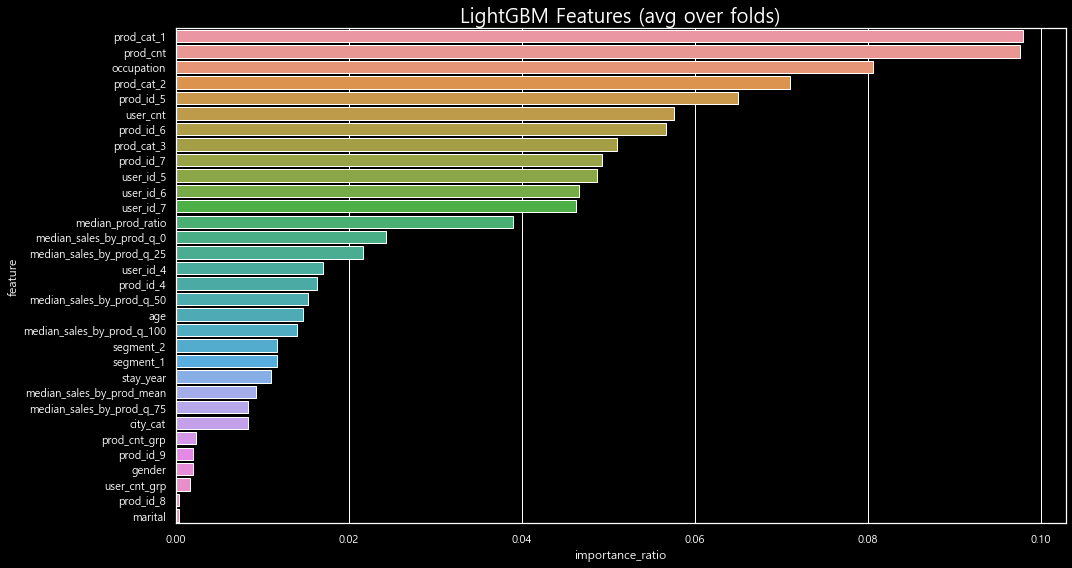

    importance                    feature  importance_ratio  importance_ratio_cumsum
0          294                 prod_cat_1          0.098000                 0.098000
1          293                   prod_cnt          0.097667                 0.195667
2          242                 occupation          0.080667                 0.276333
3          213                 prod_cat_2          0.071000                 0.347333
4          195                  prod_id_5          0.065000                 0.412333
5          173                   user_cnt          0.057667                 0.470000
6          170                  prod_id_6          0.056667                 0.526667
7          153                 prod_cat_3          0.051000                 0.577667
8          148                  prod_id_7          0.049333                 0.627000
9          146                  user_id_5          0.048667                 0.675667
10         140                  user_id_6          0.046667      

In [149]:
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,X_train.columns),reverse=True), columns=['importance','feature'])
feature_imp['importance_ratio'] = feature_imp['importance'] / sum(feature_imp['importance'])
feature_imp['importance_ratio_cumsum'] = feature_imp['importance_ratio'].cumsum()

plt.figure(figsize=(15,8))
sns.barplot(x='importance_ratio', y='feature', data=feature_imp.sort_values(by='importance_ratio', ascending=False))
plt.title('LightGBM Features (avg over folds)', fontsize = 20)
plt.tight_layout()
plt.show()

print(feature_imp)

In [150]:
drop_var = ['prod_cnt_grp','prod_id_9','gender','user_cnt_grp','prod_id_8','marital']

X_train_new = X_train.drop(drop_var,axis=1)
X_test_new  = X_test .drop(drop_var,axis=1)

In [151]:
# basic
model = ML(random_state = SEED)
model.fit(X_train_new, y_train, verbose=-1)

sub_df = test8.copy()
sub_df['target'] = model.predict(X_test_new)

# sub_df[['']]
sub_df = sub_df[['target','user_id','prod_id']].rename(columns={'user_id':'User_ID','prod_id':'Product_ID','target':'Purchase'})
sub_df.to_csv(OUT_PATH + 'submission_lgb_newfeature_reduced.csv',index=False)

LGBMRegressor(random_state=777)

In [ ]:
start_time = time.time()

# train_ls, test_ls = [],[]
# for seed in range(1,5):

train_df, test_df = train8.copy(), test8.copy()

#---------------------------------------------------------------------------------------#
# modelling
#---------------------------------------------------------------------------------------#
# larget dataset인 경우, n_split은 3이면 충분함
study = optuna.create_study(direction='minimize', study_name='LGBM Regressor')
func = lambda trial: objective(trial, X_train_new, y_train, objective='regression', n_split=3, seed = SEED)
study.optimize(func, n_trials=10)

model = ML(**study.best_params)
model.fit(X_train_new,y_train)

# seg별 predict값 넣기
train_df['pred'] = model.predict(X_train_new)
test_df ['pred'] = model.predict(X_test_new)

# train_ls.append(train_df)
# test_ls .append(test_df)

end_time = time.time()
running_time = end_time - start_time

[I 2022-01-14 01:54:26,539] A new study created in memory with name: LGBM Regressor


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=750, min_child_samples=12 will be ignored. Current value: min_data_in_leaf=750
[LightGBM] [Warning] min_gain_to_split is set=13.0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.0
[LightGBM] [Warning] bagging_fraction is set=0.30000000000000004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.30000000000000004
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.29000000000000004 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=90, reg_lambda=0.09999999999999999 will be ignored. Current value: lambda_l2=90
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boostin

[I 2022-01-14 01:55:49,555] Trial 0 finished with value: 5022.632718328862 and parameters: {'learning_rate': 1.8337208296332423e-07, 'num_leaves': 370, 'max_depth': 9, 'min_data_in_leaf': 750, 'lambda_l1': 0, 'lambda_l2': 90, 'min_gain_to_split': 13.0, 'bagging_fraction': 0.30000000000000004, 'bagging_freq': 1, 'feature_fraction': 0.8, 'n_estimators': 720, 'min_child_weight': 0.91, 'reg_alpha': 0.29000000000000004, 'reg_lambda': 0.09999999999999999, 'min_child_samples': 12}. Best is trial 0 with value: 5022.632718328862.


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=450, min_child_samples=92 will be ignored. Current value: min_data_in_leaf=450
[LightGBM] [Warning] min_gain_to_split is set=4.0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.87 will be ignored. Current value: lambda_l1=40
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.44 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current val

[I 2022-01-14 01:57:25,942] Trial 1 finished with value: 4138.359762041175 and parameters: {'learning_rate': 0.0003269898554779994, 'num_leaves': 465, 'max_depth': 1, 'min_data_in_leaf': 450, 'lambda_l1': 40, 'lambda_l2': 40, 'min_gain_to_split': 4.0, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.4, 'n_estimators': 1840, 'min_child_weight': 0.47000000000000003, 'reg_alpha': 0.87, 'reg_lambda': 0.44, 'min_child_samples': 92}. Best is trial 1 with value: 4138.359762041175.


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=40 will be ignored. Current value: min_data_in_leaf=800
[LightGBM] [Warning] min_gain_to_split is set=10.0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10.0
[LightGBM] [Warning] bagging_fraction is set=0.30000000000000004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.30000000000000004
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.09 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] lambda_l2 is set=60, reg_lambda=0.41000000000000003 will be ignored. Current value: lambda_l2=60
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=gbdt

[I 2022-01-14 02:02:54,419] Trial 2 finished with value: 2519.5762870078725 and parameters: {'learning_rate': 0.0366172160345663, 'num_leaves': 420, 'max_depth': 7, 'min_data_in_leaf': 800, 'lambda_l1': 20, 'lambda_l2': 60, 'min_gain_to_split': 10.0, 'bagging_fraction': 0.30000000000000004, 'bagging_freq': 1, 'feature_fraction': 0.4, 'n_estimators': 2470, 'min_child_weight': 0.91, 'reg_alpha': 0.09, 'reg_lambda': 0.41000000000000003, 'min_child_samples': 40}. Best is trial 2 with value: 2519.5762870078725.


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=450, min_child_samples=52 will be ignored. Current value: min_data_in_leaf=450
[LightGBM] [Warning] min_gain_to_split is set=13.0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.0
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] lambda_l1 is set=75, reg_alpha=0.65 will be ignored. Current value: lambda_l1=75
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.43 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current val

In [ ]:
running_time

In [ ]:
train_df.to_csv(OUT_PATH + 'train_df_lgb_no_seg_var_optuna_newfeature_featureselect_220114.csv',index=False)
test_df .to_csv(OUT_PATH +  'test_df_lgb_no_seg_var_optuna_newfeature_featureselect_220114.csv',index=False)

In [ ]:
sub_fn = test_df[['pred','user_id','prod_id']].rename(columns={'pred':'Purchase','user_id':'User_ID','prod_id':'Product_ID'})
sub_fn.to_csv(OUT_PATH + 'submission_lgb_no_seg_var_optuna_newfeature_featureselect_220114.csv',index=False)

<br></br>
Catboost

In [ ]:
def train_model_for_study(X, y, model):
    
    import sklearn.metrics as metrics
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.30, random_state=SEED)

    model.fit(
        X_train, 
        y_train,
        early_stopping_rounds=30,
        eval_set=[(X_valid, y_valid)], 
        verbose=False
    )

    yhat = model.predict(X_valid)
    return metrics.mean_squared_error(y_valid, yhat, squared=True)

def objective_cat(trial,X,y,cat_features,GPU_ENABLED=False):
    '''
    Objective function to tune a `CatBoostRegressor` model.
    '''

    params = {
        'iterations':trial.suggest_int("iterations", 4000, 25000),
        'od_wait':trial.suggest_int('od_wait', 500, 2300),
        'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
        'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
        'subsample': trial.suggest_uniform('subsample',0,1),
        'random_strength': trial.suggest_uniform('random_strength',10,50),
        'depth': trial.suggest_int('depth',1, 15),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf',1,30),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1,15),
    }

    if GPU_ENABLED:
        params['task_type'] = 'GPU'
        params['bootstrap_type'] = "Poisson"

    model = CatBoostRegressor(
        loss_function='RMSE',
        random_state=SEED,
        cat_features=cat_features,
        **params,
    )
    
    return train_model_for_study(X, y, model)

In [ ]:
start_time = time.time()

train_df = train8.copy()
test_df  = test8 .copy()

train_df['pred'] = np.nan
test_df ['pred'] = np.nan


seg_x = 'segment_1'
seg   = np.array([str(x) for x in sorted(train_df[seg_x].astype(int).unique())])

train_ls, test_ls, model_ls = [],[],[]

iter = 0
pbar = tqdm(seg)
for seg_value in pbar:
    pbar.set_description(f'fitting... ({seg_value})')
    
    iter += 1
    start_time_seg = time.time()
    
    tr_sub_df = train_df[train_df[seg_x]==seg_value]
    te_sub_df = test_df [test_df [seg_x]==seg_value]

    #---------------------------------------------------------------------------------------#
    # remove needless variable
    #---------------------------------------------------------------------------------------#
    drop_var = ['user_id','prod_id','target','segment_1','segment_2','prod_cat_1','pred']

    X_train = tr_sub_df[list(set(tr_sub_df.columns)-set(drop_var))]
    X_test  = te_sub_df[list(set(te_sub_df.columns)-set(drop_var))]

    y_train = tr_sub_df['target'].astype(float).values

#     #---------------------------------------------------------------------------------------#
#     # feature importance
#     #---------------------------------------------------------------------------------------#
#     model = CatBoostRegressor(random_state = SEED)
#     model.fit(X_train, y_train, verbose=-1)

#     feature_imp = pd.DataFrame(zip(X_train.columns,
#                                    model.feature_importances_.astype(float)), 
#                                columns=['feature','imp']).sort_values(by='imp')

#     reduced_var = list(feature_imp.feature[feature_imp.imp>1])

    X_train_new = X_train#[reduced_var]
    X_test_new  = X_test #[reduced_var]
    
#     del model

    cat_features = [key for key in COL_TYPE.keys() if COL_TYPE[key] in [str]]
    cat_features = list(set(X_train_new.columns) & set(cat_features))

    num_features = [key for key in COL_TYPE.keys() if COL_TYPE[key] in [int,float]]
    num_features = list(set(X_train_new.columns) & set(num_features))

    #---------------------------------------------------------------------------------------#
    # modelling
    #---------------------------------------------------------------------------------------#
    study_cat = optuna.create_study(direction='minimize', study_name='CatBoost Regressor')
    func = lambda trial: objective_cat(trial, 
                                       X = X_train_new, 
                                       y = y_train, 
                                       cat_features = cat_features)
    study_cat.optimize(func, n_trials=5)
    
    model = CatBoostRegressor(**study_cat.best_params, cat_features = cat_features)
    model.fit(X_train_new,y_train)

    # seg별 predict값 넣기
    tr_sub_df['pred'] = model.predict(X_train_new)
    te_sub_df['pred'] = model.predict(X_test_new)
    
    train_ls.append(tr_sub_df)
    test_ls .append(te_sub_df)
    model_ls.append(model)
    
    end_time_seg = time.time()
    running_time = (end_time_seg - start_time_seg)/60
    
    #print(f'({iter}/{len(seg)}) {seg_value} : {running_time:.2f} {datetime.datetime.now()}')

end_time = time.time()